In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("data/train.csv")
#test_df = pd.read_csv("data/test.csv")

In [32]:
df=pd.read_csv("train.csv")

In [37]:
df.var38.value_counts()

1.173110e+05    14868
4.519312e+05       16
4.636252e+05       12
2.889974e+05       11
1.045638e+05       11
2.366903e+05        8
3.296040e+05        7
1.046444e+05        7
6.708831e+04        7
1.257224e+05        7
1.283185e+05        7
9.763956e+04        6
1.004667e+05        6
7.081380e+04        6
1.634325e+05        6
1.687336e+05        6
1.052609e+05        6
1.853857e+05        6
8.581404e+04        5
2.354767e+05        5
1.216030e+05        5
9.303768e+04        5
6.382089e+04        5
3.318402e+04        5
1.260650e+05        5
7.130253e+04        5
2.089618e+05        5
1.719327e+05        5
1.313535e+05        5
1.271415e+05        5
1.929208e+05        5
2.273977e+05        5
2.293516e+05        5
1.857847e+05        5
8.317428e+04        5
1.487812e+05        5
2.760306e+05        5
5.332446e+04        5
9.178155e+04        4
9.628821e+04        4
6.916665e+04        4
3.451587e+05        4
3.284895e+04        4
1.064833e+05        4
1.467303e+05        4
1.720008e+

In [5]:
pd.set_option('display.max_columns', 300)
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [11]:
pd.set_option('display.max_rows', 200)
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]
[train_df[features].min()>10]
153,126,108,

[var_0      False
 var_1      False
 var_2      False
 var_3      False
 var_4      False
 var_5      False
 var_6      False
 var_7      False
 var_8      False
 var_9      False
 var_10     False
 var_11     False
 var_12      True
 var_13     False
 var_14     False
 var_15      True
 var_16     False
 var_17     False
 var_18     False
 var_19     False
 var_20     False
 var_21     False
 var_22     False
 var_23     False
 var_24     False
 var_25      True
 var_26     False
 var_27     False
 var_28     False
 var_29     False
 var_30     False
 var_31     False
 var_32     False
 var_33     False
 var_34     False
 var_35     False
 var_36     False
 var_37     False
 var_38     False
 var_39     False
 var_40     False
 var_41     False
 var_42     False
 var_43      True
 var_44     False
 var_45     False
 var_46     False
 var_47     False
 var_48     False
 var_49     False
 var_50      True
 var_51     False
 var_52     False
 var_53     False
 var_54     False
 var_55   

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 6.000e+00, 7.000e+00, 3.000e+00, 7.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 8.000e+00, 1.000e+01, 1.200e+01, 7.000e+00,
        7.000e+00, 8.000e+00, 8.000e+00, 1.400e+01, 1.900e+01, 1.900e+01,
        1.400e+01, 1.300e+01, 2.500e+01, 1.500e+01, 1.700e+01, 2.600e+01,
        2.000e+01, 2.300e+01, 2.900e+01, 3.100e+01, 2.500e+01, 3.200e+01,
        2.700e+01, 3.800e+01, 4.500e+01, 4.300e+01, 4.300e+01, 6.100e+01,
        5.200e+01, 7.100e+01, 5.200e+01, 5.900e+01, 7.400e+01, 7.100e+01,
        8.200e+01, 8.400e+01, 7.400e+01, 7.400e+01, 6.200e+01, 9.600e+01,
        1.060e+02, 1.060e+02, 1.060e+0

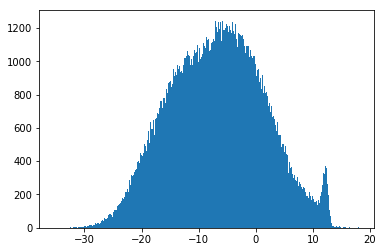

In [376]:
plt.hist(train_df.var_40, bins=400)
#plt.xlim(13,15)

In [286]:
train_df.query('var_134>=8.8 and var_134<=19.25').shape

(2887, 216)

In [342]:
train_df['r2_var_175']=np.round(train_df.var_175, 2)

In [343]:
pd.set_option('display.max_rows', 500)
train_df.r2_var_175.value_counts()

11.78    451
11.76    450
11.77    435
11.74    421
11.79    419
11.80    415
11.75    410
11.81    384
11.73    374
11.82    355
11.83    340
11.72    318
11.71    306
12.56    281
12.78    270
12.66    270
11.85    269
11.91    265
10.88    264
13.09    263
11.84    262
12.30    261
12.19    261
12.16    259
12.94    259
12.09    259
13.25    258
9.65     256
12.39    256
12.31    256
12.61    256
13.18    256
11.99    255
13.36    255
12.88    254
12.90    254
11.70    254
12.84    254
13.22    254
9.76     254
12.44    253
9.05     253
12.64    253
12.60    252
12.14    251
12.80    251
13.05    249
12.01    249
12.93    249
12.00    248
12.89    248
13.26    248
12.71    248
12.37    248
12.52    247
12.15    246
11.17    246
12.42    246
10.26    246
12.79    246
13.02    246
12.59    246
12.68    246
13.16    246
10.41    246
12.32    245
9.46     245
12.57    245
13.13    245
11.89    245
12.69    245
12.06    245
10.78    244
12.33    244
12.43    244
12.25    244
11.95    244

In [162]:
train_df.var_68.nunique()

451

In [83]:
y=train_df['target']
X= train_df.drop(['target', 'ID_code'], axis=1)
X_test = test_df.drop(['ID_code'],axis = 1)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
X_test = sc.transform(X_test)

In [16]:
splits = list(StratifiedKFold(n_splits=2, shuffle=True).split(X_small, y_small))

In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError

class DNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden_layers=5, n_neurons=100, optimizer_class=tf.train.AdamOptimizer,
                 learning_rate=0.01, batch_size=20, activation=tf.nn.elu, initializer=he_init,
                 batch_norm_momentum=None, dropout_rate=None, random_state=None,n_epochs=1000):
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None
        self.n_epochs=n_epochs

    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, self.dropout_rate, training=self._training)
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     kernel_initializer=self.initializer,
                                     name="hidden%d" % (layer + 1))
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)
            inputs = self.activation(inputs, name="hidden%d_out" % (layer + 1))
        return inputs

    def _build_graph(self, n_inputs, n_outputs):
        """Build the same model as earlier"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.int32, shape=(None), name="y")

        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name='training')
        else:
            self._training = None

        dnn_outputs = self._dnn(X)

        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                  logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        training_op = optimizer.minimize(loss)

        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        # Make the important operations available easily through instance variables
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + "/Assign")
                      for gvar_name in gvar_names}
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=1000, X_valid=None, y_valid=None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        # Translate the labels vector to a vector of sorted class indices, containing
        # integers from 0 to n_outputs - 1.
        # For example, if y is equal to [8, 8, 9, 5, 7, 6, 6, 6], then the sorted class
        # labels (self.classes_) will be equal to [5, 6, 7, 8, 9], and the labels vector
        # will be translated to [3, 3, 4, 0, 2, 1, 1, 1]
        self.class_to_index_ = {label: index
                                for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label]
                      for label in y], dtype=np.int32)
        
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)
            # extra ops for batch normalization
            extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

        # needed in case of early stopping
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None
        
        # Now train the model!
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    sess.run(self._training_op, feed_dict=feed_dict)
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict=feed_dict)
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy],
                                                 feed_dict={self._X: X_valid,
                                                            self._y: y_valid})
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_val, best_loss, acc_val * 100))
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy],
                                                     feed_dict={self._X: X_batch,
                                                                self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_train, acc_train * 100))
            # If we used early stopping then rollback to the best model found
            if best_params:
                self._restore_model_params(best_params)
            return self

    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict={self._X: X})

    def predict(self, X):
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        return np.array([[self.classes_[class_index]]
                         for class_index in class_indices], np.int32)
    #Only for scoring binary prediction here
    
    def scoring_auc_roc(self, X, y):
        with self._session.as_default() as sess:
            _,y_score = zip(*self.predict_proba(X))
            return roc_auc_score(y, y_score)
        
    def save(self, path):
        self._saver.save(self._session, path)



In [56]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [76]:
from sklearn.metrics import make_scorer
def loss_func(estimator,X_test, y_test):
    _,y_score = zip(*estimator.predict_proba(X_test))
    return roc_auc_score(y_test, y_score)

my_scorer = make_scorer(loss_func, greater_is_better=True,needs_proba=True)

In [78]:
from sklearn.model_selection import RandomizedSearchCV

def leaky_relu(alpha=0.01):
    def parametrized_leaky_relu(z, name=None):
        return tf.maximum(alpha * z, z, name=name)
    return parametrized_leaky_relu

param_distribs = {
    "n_epochs":[100,500,1000],
    "n_neurons": [10, 30, 50, 70, 90, 100, 120, 140, 160],
    "batch_size": [10, 50, 100, 500],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "activation": [tf.nn.relu, tf.nn.elu, leaky_relu(alpha=0.01), leaky_relu(alpha=0.1)],
    # you could also try exploring different numbers of hidden layers, different optimizers, etc.
    "n_hidden_layers": [2,3,4,5],
    #"optimizer_class": [tf.train.AdamOptimizer, partial(tf.train.MomentumOptimizer, momentum=0.95)],
}

rnd_search = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=100,
                                cv=3, verbose=2)
rnd_search.fit(X_train, y_train, X_valid=X_valid, y_valid=y_valid)

# If you have Scikit-Learn 0.18 or earlier, you should upgrade, or use the fit_params argument:
# fit_params = dict(X_valid=X_valid1, y_valid=y_valid1, n_epochs=1000)
# rnd_search = RandomizedSearchCV(DNNClassifier(random_state=42), param_distribs, n_iter=50,
#                                 fit_params=fit_params, random_state=42, verbose=2)
# rnd_search.fit(X_train1, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_neurons=70, n_hidden_layers=3, n_epochs=500, learning_rate=0.02, batch_size=50, activation=<function elu at 0x0000023F135E9EA0> 
0	Validation loss: 0.312651	Best loss: 0.312651	Accuracy: 89.78%
1	Validation loss: 0.249252	Best loss: 0.249252	Accuracy: 90.94%
2	Validation loss: 0.283712	Best loss: 0.249252	Accuracy: 90.03%
3	Validation loss: 0.307088	Best loss: 0.249252	Accuracy: 87.61%
4	Validation loss: 0.321024	Best loss: 0.249252	Accuracy: 89.77%
5	Validation loss: 0.335243	Best loss: 0.249252	Accuracy: 90.32%
6	Validation loss: 0.264652	Best loss: 0.249252	Accuracy: 91.23%
7	Validation loss: 0.292328	Best loss: 0.249252	Accuracy: 90.64%
8	Validation loss: 0.291981	Best loss: 0.249252	Accuracy: 90.70%
9	Validation loss: 0.266646	Best loss: 0.249252	Accuracy: 91.15%
10	Validation loss: 0.268153	Best loss: 0.249252	Accuracy: 90.15%
11	Validation loss: 0.340718	Best loss: 0.249252	Accuracy: 89.75%
12	Validation loss:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


0	Validation loss: 0.355173	Best loss: 0.355173	Accuracy: 89.75%
1	Validation loss: 0.330944	Best loss: 0.330944	Accuracy: 89.76%
2	Validation loss: 0.349026	Best loss: 0.330944	Accuracy: 89.75%
3	Validation loss: 0.338089	Best loss: 0.330944	Accuracy: 89.76%
4	Validation loss: 0.330380	Best loss: 0.330380	Accuracy: 89.76%
5	Validation loss: 0.331943	Best loss: 0.330380	Accuracy: 89.76%
6	Validation loss: 0.332496	Best loss: 0.330380	Accuracy: 89.76%
7	Validation loss: 0.470782	Best loss: 0.330380	Accuracy: 89.76%
8	Validation loss: 0.333622	Best loss: 0.330380	Accuracy: 89.76%
9	Validation loss: 0.407605	Best loss: 0.330380	Accuracy: 89.76%
10	Validation loss: 0.370862	Best loss: 0.330380	Accuracy: 89.76%
11	Validation loss: 0.345387	Best loss: 0.330380	Accuracy: 89.76%
12	Validation loss: 0.335711	Best loss: 0.330380	Accuracy: 89.76%
13	Validation loss: 0.347466	Best loss: 0.330380	Accuracy: 89.76%
14	Validation loss: 0.384494	Best loss: 0.330380	Accuracy: 89.76%
15	Validation loss: 

13	Validation loss: 0.338053	Best loss: 0.245757	Accuracy: 89.78%
14	Validation loss: 0.532820	Best loss: 0.245757	Accuracy: 89.75%
15	Validation loss: 0.278652	Best loss: 0.245757	Accuracy: 90.15%
16	Validation loss: 5.334603	Best loss: 0.245757	Accuracy: 89.63%
17	Validation loss: 0.301923	Best loss: 0.245757	Accuracy: 89.73%
18	Validation loss: 0.301119	Best loss: 0.245757	Accuracy: 89.79%
19	Validation loss: 0.287676	Best loss: 0.245757	Accuracy: 89.86%
20	Validation loss: 0.287576	Best loss: 0.245757	Accuracy: 89.86%
21	Validation loss: 0.275503	Best loss: 0.245757	Accuracy: 90.26%
22	Validation loss: 0.716686	Best loss: 0.245757	Accuracy: 89.75%
23	Validation loss: 0.307049	Best loss: 0.245757	Accuracy: 89.82%
24	Validation loss: 0.309110	Best loss: 0.245757	Accuracy: 89.72%
25	Validation loss: 0.346445	Best loss: 0.245757	Accuracy: 89.82%
26	Validation loss: 0.282601	Best loss: 0.245757	Accuracy: 90.38%
27	Validation loss: 7.209534	Best loss: 0.245757	Accuracy: 86.29%
28	Validat

6	Validation loss: 0.407807	Best loss: 0.407807	Accuracy: 90.07%
7	Validation loss: 0.746102	Best loss: 0.407807	Accuracy: 86.64%
8	Validation loss: 0.394602	Best loss: 0.394602	Accuracy: 90.43%
9	Validation loss: 1.346688	Best loss: 0.394602	Accuracy: 80.25%
10	Validation loss: 0.380448	Best loss: 0.380448	Accuracy: 90.43%
11	Validation loss: 0.355966	Best loss: 0.355966	Accuracy: 85.72%
12	Validation loss: 2.909405	Best loss: 0.355966	Accuracy: 89.62%
13	Validation loss: 0.622948	Best loss: 0.355966	Accuracy: 84.11%
14	Validation loss: 0.363972	Best loss: 0.355966	Accuracy: 89.97%
15	Validation loss: 4.875163	Best loss: 0.355966	Accuracy: 57.85%
16	Validation loss: 1.731657	Best loss: 0.355966	Accuracy: 81.64%
17	Validation loss: 0.408261	Best loss: 0.355966	Accuracy: 90.17%
18	Validation loss: 7.158253	Best loss: 0.355966	Accuracy: 88.57%
19	Validation loss: 1.077536	Best loss: 0.355966	Accuracy: 89.82%
20	Validation loss: 0.465475	Best loss: 0.355966	Accuracy: 87.67%
21	Validation 

2	Validation loss: 0.248339	Best loss: 0.248339	Accuracy: 90.87%
3	Validation loss: 0.257161	Best loss: 0.248339	Accuracy: 90.93%
4	Validation loss: 0.256512	Best loss: 0.248339	Accuracy: 90.74%
5	Validation loss: 0.279769	Best loss: 0.248339	Accuracy: 90.62%
6	Validation loss: 0.264346	Best loss: 0.248339	Accuracy: 90.77%
7	Validation loss: 0.264354	Best loss: 0.248339	Accuracy: 90.79%
8	Validation loss: 0.276141	Best loss: 0.248339	Accuracy: 90.50%
9	Validation loss: 0.284999	Best loss: 0.248339	Accuracy: 90.24%
10	Validation loss: 0.313724	Best loss: 0.248339	Accuracy: 88.74%
11	Validation loss: 0.302349	Best loss: 0.248339	Accuracy: 89.68%
12	Validation loss: 0.324744	Best loss: 0.248339	Accuracy: 90.09%
13	Validation loss: 0.334689	Best loss: 0.248339	Accuracy: 89.40%
14	Validation loss: 0.370190	Best loss: 0.248339	Accuracy: 90.01%
15	Validation loss: 0.354464	Best loss: 0.248339	Accuracy: 89.71%
16	Validation loss: 0.359126	Best loss: 0.248339	Accuracy: 88.63%
17	Validation loss

40	Validation loss: 0.686361	Best loss: 0.269803	Accuracy: 85.17%
41	Validation loss: 0.640192	Best loss: 0.269803	Accuracy: 78.00%
42	Validation loss: 0.715949	Best loss: 0.269803	Accuracy: 89.76%
43	Validation loss: 0.295906	Best loss: 0.269803	Accuracy: 88.75%
44	Validation loss: 0.268460	Best loss: 0.268460	Accuracy: 90.16%
45	Validation loss: 2.298534	Best loss: 0.268460	Accuracy: 58.42%
46	Validation loss: 0.302677	Best loss: 0.268460	Accuracy: 88.50%
47	Validation loss: 0.645016	Best loss: 0.268460	Accuracy: 87.60%
48	Validation loss: 0.316080	Best loss: 0.268460	Accuracy: 90.22%
49	Validation loss: 1.225120	Best loss: 0.268460	Accuracy: 89.76%
50	Validation loss: 0.277612	Best loss: 0.268460	Accuracy: 90.24%
51	Validation loss: 0.297392	Best loss: 0.268460	Accuracy: 88.37%
52	Validation loss: 1.096915	Best loss: 0.268460	Accuracy: 89.76%
53	Validation loss: 0.358380	Best loss: 0.268460	Accuracy: 89.96%
54	Validation loss: 0.296986	Best loss: 0.268460	Accuracy: 88.27%
55	Validat

59	Validation loss: 329.485260	Best loss: 76.365051	Accuracy: 90.22%
60	Validation loss: 225.263901	Best loss: 76.365051	Accuracy: 90.13%
61	Validation loss: 156.064224	Best loss: 76.365051	Accuracy: 89.31%
62	Validation loss: 152.707748	Best loss: 76.365051	Accuracy: 86.89%
63	Validation loss: 521.574951	Best loss: 76.365051	Accuracy: 90.03%
64	Validation loss: 1089.010620	Best loss: 76.365051	Accuracy: 90.14%
65	Validation loss: 494.691986	Best loss: 76.365051	Accuracy: 75.20%
66	Validation loss: 370.133728	Best loss: 76.365051	Accuracy: 60.12%
67	Validation loss: 185.911713	Best loss: 76.365051	Accuracy: 90.01%
68	Validation loss: 248.832901	Best loss: 76.365051	Accuracy: 90.06%
Early stopping!
[CV]  n_neurons=70, n_hidden_layers=3, n_epochs=100, learning_rate=0.1, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048>, total= 8.2min
[CV] n_neurons=70, n_hidden_layers=3, n_epochs=100, learning_rate=0.1, batch_size=10, activation=<funct

0	Validation loss: 593.812439	Best loss: 593.812439	Accuracy: 89.76%
1	Validation loss: 2484330.500000	Best loss: 593.812439	Accuracy: 89.73%
2	Validation loss: 18955.669922	Best loss: 593.812439	Accuracy: 85.18%
3	Validation loss: 24508.921875	Best loss: 593.812439	Accuracy: 89.53%
4	Validation loss: 24218.224609	Best loss: 593.812439	Accuracy: 89.73%
5	Validation loss: 21246.537109	Best loss: 593.812439	Accuracy: 89.45%
6	Validation loss: 11206.688477	Best loss: 593.812439	Accuracy: 89.73%
7	Validation loss: 2443.981689	Best loss: 593.812439	Accuracy: 88.59%
8	Validation loss: 398844.125000	Best loss: 593.812439	Accuracy: 89.76%
9	Validation loss: 157581.234375	Best loss: 593.812439	Accuracy: 89.76%
10	Validation loss: 124193.960938	Best loss: 593.812439	Accuracy: 13.85%
11	Validation loss: 77165.289062	Best loss: 593.812439	Accuracy: 89.76%
12	Validation loss: 21356.054688	Best loss: 593.812439	Accuracy: 89.84%
13	Validation loss: 2152.893066	Best loss: 593.812439	Accuracy: 86.11%
1

16	Validation loss: 1.069677	Best loss: 0.331514	Accuracy: 89.76%
17	Validation loss: 0.391851	Best loss: 0.331514	Accuracy: 89.76%
18	Validation loss: 0.358765	Best loss: 0.331514	Accuracy: 89.76%
19	Validation loss: 0.330957	Best loss: 0.330957	Accuracy: 89.76%
20	Validation loss: 0.428748	Best loss: 0.330957	Accuracy: 89.76%
21	Validation loss: 0.368020	Best loss: 0.330957	Accuracy: 89.76%
22	Validation loss: 0.563025	Best loss: 0.330957	Accuracy: 89.76%
23	Validation loss: 0.391882	Best loss: 0.330957	Accuracy: 89.76%
24	Validation loss: 0.488241	Best loss: 0.330957	Accuracy: 89.76%
25	Validation loss: 0.626640	Best loss: 0.330957	Accuracy: 89.76%
26	Validation loss: 0.483944	Best loss: 0.330957	Accuracy: 89.76%
27	Validation loss: 0.356578	Best loss: 0.330957	Accuracy: 89.76%
28	Validation loss: 0.390068	Best loss: 0.330957	Accuracy: 89.76%
29	Validation loss: 0.350449	Best loss: 0.330957	Accuracy: 89.76%
30	Validation loss: 0.353231	Best loss: 0.330957	Accuracy: 89.76%
31	Validat

0	Validation loss: 0.245668	Best loss: 0.245668	Accuracy: 91.05%
1	Validation loss: 0.243308	Best loss: 0.243308	Accuracy: 91.00%
2	Validation loss: 0.244693	Best loss: 0.243308	Accuracy: 91.00%
3	Validation loss: 0.245733	Best loss: 0.243308	Accuracy: 90.97%
4	Validation loss: 0.265065	Best loss: 0.243308	Accuracy: 89.76%
5	Validation loss: 0.261581	Best loss: 0.243308	Accuracy: 89.76%
6	Validation loss: 0.269533	Best loss: 0.243308	Accuracy: 89.64%
7	Validation loss: 0.254058	Best loss: 0.243308	Accuracy: 90.14%
8	Validation loss: 0.255698	Best loss: 0.243308	Accuracy: 90.28%
9	Validation loss: 0.253271	Best loss: 0.243308	Accuracy: 90.74%
10	Validation loss: 0.255236	Best loss: 0.243308	Accuracy: 90.53%
11	Validation loss: 0.259520	Best loss: 0.243308	Accuracy: 90.78%
12	Validation loss: 0.260767	Best loss: 0.243308	Accuracy: 90.65%
13	Validation loss: 0.261743	Best loss: 0.243308	Accuracy: 90.29%
14	Validation loss: 0.265709	Best loss: 0.243308	Accuracy: 90.41%
15	Validation loss: 

9	Validation loss: 0.330806	Best loss: 0.330695	Accuracy: 89.76%
10	Validation loss: 0.337895	Best loss: 0.330695	Accuracy: 89.76%
11	Validation loss: 0.331420	Best loss: 0.330695	Accuracy: 89.76%
12	Validation loss: 0.333268	Best loss: 0.330695	Accuracy: 89.76%
13	Validation loss: 0.334268	Best loss: 0.330695	Accuracy: 89.76%
14	Validation loss: 0.331163	Best loss: 0.330695	Accuracy: 89.76%
15	Validation loss: 0.330871	Best loss: 0.330695	Accuracy: 89.76%
16	Validation loss: 0.330741	Best loss: 0.330695	Accuracy: 89.76%
17	Validation loss: 0.333426	Best loss: 0.330695	Accuracy: 89.76%
18	Validation loss: 0.339167	Best loss: 0.330695	Accuracy: 89.76%
19	Validation loss: 0.331254	Best loss: 0.330695	Accuracy: 89.76%
20	Validation loss: 0.332443	Best loss: 0.330695	Accuracy: 89.76%
21	Validation loss: 0.339682	Best loss: 0.330695	Accuracy: 89.76%
22	Validation loss: 0.332588	Best loss: 0.330695	Accuracy: 89.76%
23	Validation loss: 0.331061	Best loss: 0.330695	Accuracy: 89.76%
24	Validati

0	Validation loss: 0.273756	Best loss: 0.273756	Accuracy: 89.75%
1	Validation loss: 0.276518	Best loss: 0.273756	Accuracy: 89.75%
2	Validation loss: 0.279006	Best loss: 0.273756	Accuracy: 89.75%
3	Validation loss: 0.350407	Best loss: 0.273756	Accuracy: 89.75%
4	Validation loss: 0.688064	Best loss: 0.273756	Accuracy: 89.75%
5	Validation loss: 0.342116	Best loss: 0.273756	Accuracy: 89.75%
6	Validation loss: 0.341055	Best loss: 0.273756	Accuracy: 89.75%
7	Validation loss: 1.463373	Best loss: 0.273756	Accuracy: 89.75%
8	Validation loss: 0.357768	Best loss: 0.273756	Accuracy: 89.75%
9	Validation loss: 0.333227	Best loss: 0.273756	Accuracy: 89.75%
10	Validation loss: 0.424156	Best loss: 0.273756	Accuracy: 89.75%
11	Validation loss: 0.341119	Best loss: 0.273756	Accuracy: 89.75%
12	Validation loss: 1.062199	Best loss: 0.273756	Accuracy: 89.75%
13	Validation loss: 0.850235	Best loss: 0.273756	Accuracy: 89.75%
14	Validation loss: 0.381507	Best loss: 0.273756	Accuracy: 89.75%
15	Validation loss: 

5	Validation loss: 0.313029	Best loss: 0.259268	Accuracy: 90.16%
6	Validation loss: 0.317810	Best loss: 0.259268	Accuracy: 90.52%
7	Validation loss: 0.309605	Best loss: 0.259268	Accuracy: 87.75%
8	Validation loss: 0.276385	Best loss: 0.259268	Accuracy: 90.59%
9	Validation loss: 0.270998	Best loss: 0.259268	Accuracy: 90.33%
10	Validation loss: 0.277802	Best loss: 0.259268	Accuracy: 90.14%
11	Validation loss: 0.292102	Best loss: 0.259268	Accuracy: 90.48%
12	Validation loss: 0.307401	Best loss: 0.259268	Accuracy: 88.49%
13	Validation loss: 0.346370	Best loss: 0.259268	Accuracy: 90.34%
14	Validation loss: 0.298976	Best loss: 0.259268	Accuracy: 89.32%
15	Validation loss: 0.380263	Best loss: 0.259268	Accuracy: 88.75%
16	Validation loss: 0.387785	Best loss: 0.259268	Accuracy: 84.94%
17	Validation loss: 0.421035	Best loss: 0.259268	Accuracy: 88.90%
18	Validation loss: 0.451338	Best loss: 0.259268	Accuracy: 90.18%
19	Validation loss: 0.387640	Best loss: 0.259268	Accuracy: 86.83%
20	Validation l

6	Validation loss: 810.990601	Best loss: 2.358134	Accuracy: 89.76%
7	Validation loss: 16.495100	Best loss: 2.358134	Accuracy: 89.75%
8	Validation loss: 49.713776	Best loss: 2.358134	Accuracy: 89.72%
9	Validation loss: 77.796722	Best loss: 2.358134	Accuracy: 89.81%
10	Validation loss: 14.193682	Best loss: 2.358134	Accuracy: 76.35%
11	Validation loss: 13.984103	Best loss: 2.358134	Accuracy: 63.29%
12	Validation loss: 11.562147	Best loss: 2.358134	Accuracy: 80.93%
13	Validation loss: 70.271721	Best loss: 2.358134	Accuracy: 89.76%
14	Validation loss: 90.408508	Best loss: 2.358134	Accuracy: 51.81%
15	Validation loss: 22.455917	Best loss: 2.358134	Accuracy: 85.18%
16	Validation loss: 99.234489	Best loss: 2.358134	Accuracy: 89.76%
17	Validation loss: 11.011345	Best loss: 2.358134	Accuracy: 85.04%
18	Validation loss: 194.782303	Best loss: 2.358134	Accuracy: 89.76%
19	Validation loss: 253.842773	Best loss: 2.358134	Accuracy: 89.33%
20	Validation loss: 84.809677	Best loss: 2.358134	Accuracy: 28.

16	Validation loss: 0.333277	Best loss: 0.324061	Accuracy: 89.76%
17	Validation loss: 0.342849	Best loss: 0.324061	Accuracy: 89.76%
18	Validation loss: 0.331005	Best loss: 0.324061	Accuracy: 89.75%
19	Validation loss: 0.331403	Best loss: 0.324061	Accuracy: 89.76%
20	Validation loss: 0.342693	Best loss: 0.324061	Accuracy: 89.76%
21	Validation loss: 0.332818	Best loss: 0.324061	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=2, n_epochs=1000, learning_rate=0.05, batch_size=50, activation=<function elu at 0x0000023F135E9EA0>, total=  28.8s
[CV] n_neurons=30, n_hidden_layers=2, n_epochs=1000, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048> 
0	Validation loss: 0.287884	Best loss: 0.287884	Accuracy: 89.50%
1	Validation loss: 0.285126	Best loss: 0.285126	Accuracy: 90.21%
2	Validation loss: 0.260509	Best loss: 0.260509	Accuracy: 90.48%
3	Validation loss: 0.260026	Best loss: 0.260026	Accuracy: 90.44

0	Validation loss: 0.253555	Best loss: 0.253555	Accuracy: 90.81%
1	Validation loss: 0.259677	Best loss: 0.253555	Accuracy: 90.42%
2	Validation loss: 0.253583	Best loss: 0.253555	Accuracy: 90.56%
3	Validation loss: 0.253010	Best loss: 0.253010	Accuracy: 90.35%
4	Validation loss: 0.272135	Best loss: 0.253010	Accuracy: 89.78%
5	Validation loss: 0.268836	Best loss: 0.253010	Accuracy: 90.76%
6	Validation loss: 0.263127	Best loss: 0.253010	Accuracy: 90.11%
7	Validation loss: 0.255907	Best loss: 0.253010	Accuracy: 90.69%
8	Validation loss: 0.248749	Best loss: 0.248749	Accuracy: 91.03%
9	Validation loss: 0.249353	Best loss: 0.248749	Accuracy: 91.06%
10	Validation loss: 0.317993	Best loss: 0.248749	Accuracy: 88.03%
11	Validation loss: 0.298473	Best loss: 0.248749	Accuracy: 88.80%
12	Validation loss: 0.290676	Best loss: 0.248749	Accuracy: 89.74%
13	Validation loss: 0.254388	Best loss: 0.248749	Accuracy: 91.00%
14	Validation loss: 0.262191	Best loss: 0.248749	Accuracy: 90.40%
15	Validation loss: 

0	Validation loss: 2.271627	Best loss: 2.271627	Accuracy: 89.67%
1	Validation loss: 39.473289	Best loss: 2.271627	Accuracy: 89.46%
2	Validation loss: 2.813603	Best loss: 2.271627	Accuracy: 89.18%
3	Validation loss: 14.639147	Best loss: 2.271627	Accuracy: 89.54%
4	Validation loss: 4.769032	Best loss: 2.271627	Accuracy: 59.50%
5	Validation loss: 15.157503	Best loss: 2.271627	Accuracy: 88.92%
6	Validation loss: 112.034378	Best loss: 2.271627	Accuracy: 89.65%
7	Validation loss: 32127.750000	Best loss: 2.271627	Accuracy: 87.53%
8	Validation loss: 15.415631	Best loss: 2.271627	Accuracy: 89.81%
9	Validation loss: 235.575806	Best loss: 2.271627	Accuracy: 89.60%
10	Validation loss: 123.354774	Best loss: 2.271627	Accuracy: 89.76%
11	Validation loss: 18.930260	Best loss: 2.271627	Accuracy: 89.31%
12	Validation loss: 15.388980	Best loss: 2.271627	Accuracy: 85.80%
13	Validation loss: 425.618408	Best loss: 2.271627	Accuracy: 81.95%
14	Validation loss: 14.171481	Best loss: 2.271627	Accuracy: 57.29%
1

6	Validation loss: 0.289545	Best loss: 0.256930	Accuracy: 88.67%
7	Validation loss: 0.266426	Best loss: 0.256930	Accuracy: 90.23%
8	Validation loss: 0.264808	Best loss: 0.256930	Accuracy: 90.90%
9	Validation loss: 0.285966	Best loss: 0.256930	Accuracy: 89.81%
10	Validation loss: 0.264098	Best loss: 0.256930	Accuracy: 90.51%
11	Validation loss: 0.269926	Best loss: 0.256930	Accuracy: 90.53%
12	Validation loss: 0.285484	Best loss: 0.256930	Accuracy: 90.36%
13	Validation loss: 0.302843	Best loss: 0.256930	Accuracy: 90.42%
14	Validation loss: 0.296652	Best loss: 0.256930	Accuracy: 90.58%
15	Validation loss: 0.290485	Best loss: 0.256930	Accuracy: 89.36%
16	Validation loss: 0.299648	Best loss: 0.256930	Accuracy: 90.25%
17	Validation loss: 0.298006	Best loss: 0.256930	Accuracy: 89.28%
18	Validation loss: 0.300077	Best loss: 0.256930	Accuracy: 90.18%
19	Validation loss: 0.309106	Best loss: 0.256930	Accuracy: 90.11%
20	Validation loss: 0.301769	Best loss: 0.256930	Accuracy: 89.72%
21	Validation 

2	Validation loss: 730.501892	Best loss: 730.501892	Accuracy: 73.68%
3	Validation loss: 78442.460938	Best loss: 730.501892	Accuracy: 89.75%
4	Validation loss: 12500.241211	Best loss: 730.501892	Accuracy: 89.76%
5	Validation loss: 7247.794434	Best loss: 730.501892	Accuracy: 89.74%
6	Validation loss: 10209.167969	Best loss: 730.501892	Accuracy: 89.77%
7	Validation loss: 4203.186035	Best loss: 730.501892	Accuracy: 89.31%
8	Validation loss: 12902.819336	Best loss: 730.501892	Accuracy: 89.45%
9	Validation loss: 13786.659180	Best loss: 730.501892	Accuracy: 89.77%
10	Validation loss: 62040.152344	Best loss: 730.501892	Accuracy: 89.88%
11	Validation loss: 32522.285156	Best loss: 730.501892	Accuracy: 89.77%
12	Validation loss: 6003.833984	Best loss: 730.501892	Accuracy: 90.12%
13	Validation loss: 33058.414062	Best loss: 730.501892	Accuracy: 89.74%
14	Validation loss: 7702.905762	Best loss: 730.501892	Accuracy: 89.82%
15	Validation loss: 125531.007812	Best loss: 730.501892	Accuracy: 89.75%
16	Va

9	Validation loss: 0.349043	Best loss: 0.264678	Accuracy: 89.78%
10	Validation loss: 0.277135	Best loss: 0.264678	Accuracy: 90.09%
11	Validation loss: 0.365576	Best loss: 0.264678	Accuracy: 88.30%
12	Validation loss: 0.312895	Best loss: 0.264678	Accuracy: 89.57%
13	Validation loss: 0.265662	Best loss: 0.264678	Accuracy: 90.35%
14	Validation loss: 0.291781	Best loss: 0.264678	Accuracy: 89.33%
15	Validation loss: 0.344594	Best loss: 0.264678	Accuracy: 89.74%
16	Validation loss: 0.719350	Best loss: 0.264678	Accuracy: 90.36%
17	Validation loss: 0.322198	Best loss: 0.264678	Accuracy: 87.14%
18	Validation loss: 0.281316	Best loss: 0.264678	Accuracy: 89.99%
19	Validation loss: 0.294993	Best loss: 0.264678	Accuracy: 90.38%
20	Validation loss: 0.342637	Best loss: 0.264678	Accuracy: 90.27%
21	Validation loss: 0.358716	Best loss: 0.264678	Accuracy: 89.93%
22	Validation loss: 0.315592	Best loss: 0.264678	Accuracy: 89.99%
23	Validation loss: 0.476266	Best loss: 0.264678	Accuracy: 81.38%
24	Validati

0	Validation loss: 0.713468	Best loss: 0.713468	Accuracy: 89.74%
1	Validation loss: 0.259012	Best loss: 0.259012	Accuracy: 90.47%
2	Validation loss: 0.250987	Best loss: 0.250987	Accuracy: 90.54%
3	Validation loss: 0.243083	Best loss: 0.243083	Accuracy: 91.05%
4	Validation loss: 0.244341	Best loss: 0.243083	Accuracy: 91.04%
5	Validation loss: 0.289676	Best loss: 0.243083	Accuracy: 90.85%
6	Validation loss: 0.252324	Best loss: 0.243083	Accuracy: 90.96%
7	Validation loss: 0.241225	Best loss: 0.241225	Accuracy: 91.03%
8	Validation loss: 0.299666	Best loss: 0.241225	Accuracy: 90.17%
9	Validation loss: 0.268172	Best loss: 0.241225	Accuracy: 90.42%
10	Validation loss: 0.274981	Best loss: 0.241225	Accuracy: 90.17%
11	Validation loss: 0.252612	Best loss: 0.241225	Accuracy: 90.75%
12	Validation loss: 0.249157	Best loss: 0.241225	Accuracy: 90.90%
13	Validation loss: 0.267156	Best loss: 0.241225	Accuracy: 90.06%
14	Validation loss: 0.255327	Best loss: 0.241225	Accuracy: 90.72%
15	Validation loss: 

2	Validation loss: 1.207675	Best loss: 0.613810	Accuracy: 10.24%
3	Validation loss: 1.134119	Best loss: 0.613810	Accuracy: 89.76%
4	Validation loss: 0.365783	Best loss: 0.365783	Accuracy: 89.76%
5	Validation loss: 0.338354	Best loss: 0.338354	Accuracy: 89.76%
6	Validation loss: 0.487316	Best loss: 0.338354	Accuracy: 89.76%
7	Validation loss: 0.627122	Best loss: 0.338354	Accuracy: 89.76%
8	Validation loss: 0.508079	Best loss: 0.338354	Accuracy: 89.76%
9	Validation loss: 0.344575	Best loss: 0.338354	Accuracy: 89.76%
10	Validation loss: 0.333185	Best loss: 0.333185	Accuracy: 89.76%
11	Validation loss: 0.335005	Best loss: 0.333185	Accuracy: 89.76%
12	Validation loss: 0.351039	Best loss: 0.333185	Accuracy: 89.76%
13	Validation loss: 1.103911	Best loss: 0.333185	Accuracy: 10.24%
14	Validation loss: 0.341691	Best loss: 0.333185	Accuracy: 89.76%
15	Validation loss: 0.498674	Best loss: 0.333185	Accuracy: 89.76%
16	Validation loss: 1.098427	Best loss: 0.333185	Accuracy: 89.76%
17	Validation loss

29	Validation loss: 0.348740	Best loss: 0.278307	Accuracy: 90.36%
30	Validation loss: 0.313873	Best loss: 0.278307	Accuracy: 90.48%
31	Validation loss: 0.366650	Best loss: 0.278307	Accuracy: 90.03%
32	Validation loss: 0.295346	Best loss: 0.278307	Accuracy: 89.33%
33	Validation loss: 0.562912	Best loss: 0.278307	Accuracy: 90.07%
34	Validation loss: 0.350535	Best loss: 0.278307	Accuracy: 90.61%
35	Validation loss: 0.502671	Best loss: 0.278307	Accuracy: 90.36%
36	Validation loss: 0.404825	Best loss: 0.278307	Accuracy: 83.00%
37	Validation loss: 0.301221	Best loss: 0.278307	Accuracy: 90.16%
38	Validation loss: 0.333543	Best loss: 0.278307	Accuracy: 89.25%
39	Validation loss: 0.341981	Best loss: 0.278307	Accuracy: 88.44%
40	Validation loss: 0.491708	Best loss: 0.278307	Accuracy: 90.46%
41	Validation loss: 0.307563	Best loss: 0.278307	Accuracy: 88.23%
Early stopping!
[CV]  n_neurons=160, n_hidden_layers=2, n_epochs=1000, learning_rate=0.02, batch_size=50, activation=<function leaky_relu.<loc

[CV]  n_neurons=100, n_hidden_layers=3, n_epochs=500, learning_rate=0.1, batch_size=50, activation=<function elu at 0x0000023F135E9EA0>, total= 1.2min
[CV] n_neurons=100, n_hidden_layers=3, n_epochs=500, learning_rate=0.1, batch_size=50, activation=<function elu at 0x0000023F135E9EA0> 
0	Validation loss: 0.343721	Best loss: 0.343721	Accuracy: 89.76%
1	Validation loss: 0.436218	Best loss: 0.343721	Accuracy: 89.76%
2	Validation loss: 0.655165	Best loss: 0.343721	Accuracy: 89.76%
3	Validation loss: 0.505266	Best loss: 0.343721	Accuracy: 89.76%
4	Validation loss: 0.600135	Best loss: 0.343721	Accuracy: 89.76%
5	Validation loss: 0.407275	Best loss: 0.343721	Accuracy: 89.76%
6	Validation loss: 0.340552	Best loss: 0.340552	Accuracy: 89.76%
7	Validation loss: 0.335690	Best loss: 0.335690	Accuracy: 89.76%
8	Validation loss: 0.512030	Best loss: 0.335690	Accuracy: 89.76%
9	Validation loss: 0.369801	Best loss: 0.335690	Accuracy: 89.76%
10	Validation loss: 0.847675	Best loss: 0.335690	Accuracy: 89.7

[CV]  n_neurons=30, n_hidden_layers=3, n_epochs=100, learning_rate=0.02, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total=  47.4s
[CV] n_neurons=30, n_hidden_layers=3, n_epochs=100, learning_rate=0.02, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 0.253026	Best loss: 0.253026	Accuracy: 90.85%
1	Validation loss: 0.241175	Best loss: 0.241175	Accuracy: 91.16%
2	Validation loss: 0.243615	Best loss: 0.241175	Accuracy: 91.01%
3	Validation loss: 0.247751	Best loss: 0.241175	Accuracy: 91.03%
4	Validation loss: 0.247799	Best loss: 0.241175	Accuracy: 90.79%
5	Validation loss: 0.263994	Best loss: 0.241175	Accuracy: 90.74%
6	Validation loss: 0.243482	Best loss: 0.241175	Accuracy: 91.11%
7	Validation loss: 0.245902	Best loss: 0.241175	Accuracy: 91.05%
8	Validation loss: 0.244947	Best loss: 0.241175	Accuracy: 91.11%
9	Validation loss: 0.253691	Best loss: 0.24117

33	Validation loss: 0.331096	Best loss: 0.330398	Accuracy: 89.76%
34	Validation loss: 0.398919	Best loss: 0.330398	Accuracy: 89.76%
35	Validation loss: 0.344147	Best loss: 0.330398	Accuracy: 89.76%
36	Validation loss: 0.377828	Best loss: 0.330398	Accuracy: 89.76%
37	Validation loss: 0.333397	Best loss: 0.330398	Accuracy: 89.76%
38	Validation loss: 0.330901	Best loss: 0.330398	Accuracy: 89.76%
39	Validation loss: 0.332094	Best loss: 0.330398	Accuracy: 89.76%
40	Validation loss: 0.398565	Best loss: 0.330398	Accuracy: 89.76%
41	Validation loss: 0.345070	Best loss: 0.330398	Accuracy: 89.76%
42	Validation loss: 0.332570	Best loss: 0.330398	Accuracy: 89.76%
43	Validation loss: 0.331325	Best loss: 0.330398	Accuracy: 89.76%
44	Validation loss: 0.331465	Best loss: 0.330398	Accuracy: 89.76%
45	Validation loss: 0.356642	Best loss: 0.330398	Accuracy: 89.76%
46	Validation loss: 0.330889	Best loss: 0.330398	Accuracy: 89.76%
47	Validation loss: 0.396462	Best loss: 0.330398	Accuracy: 89.76%
48	Validat

71	Validation loss: 0.330783	Best loss: 0.330377	Accuracy: 89.76%
72	Validation loss: 0.330385	Best loss: 0.330377	Accuracy: 89.76%
73	Validation loss: 0.330549	Best loss: 0.330377	Accuracy: 89.76%
74	Validation loss: 0.330413	Best loss: 0.330377	Accuracy: 89.76%
75	Validation loss: 0.332068	Best loss: 0.330377	Accuracy: 89.76%
76	Validation loss: 0.330416	Best loss: 0.330377	Accuracy: 89.76%
77	Validation loss: 0.330523	Best loss: 0.330377	Accuracy: 89.76%
78	Validation loss: 0.330722	Best loss: 0.330377	Accuracy: 89.76%
79	Validation loss: 0.330950	Best loss: 0.330377	Accuracy: 89.76%
80	Validation loss: 0.330592	Best loss: 0.330377	Accuracy: 89.76%
81	Validation loss: 0.332577	Best loss: 0.330377	Accuracy: 89.76%
82	Validation loss: 0.331014	Best loss: 0.330377	Accuracy: 89.76%
83	Validation loss: 0.331276	Best loss: 0.330377	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=5, n_epochs=500, learning_rate=0.05, batch_size=10, activation=<function relu at 0x0000023

0	Validation loss: 0.245983	Best loss: 0.245983	Accuracy: 90.72%
1	Validation loss: 0.247360	Best loss: 0.245983	Accuracy: 90.78%
2	Validation loss: 0.244596	Best loss: 0.244596	Accuracy: 90.81%
3	Validation loss: 0.245902	Best loss: 0.244596	Accuracy: 90.97%
4	Validation loss: 0.247659	Best loss: 0.244596	Accuracy: 90.81%
5	Validation loss: 0.253687	Best loss: 0.244596	Accuracy: 90.85%
6	Validation loss: 0.257268	Best loss: 0.244596	Accuracy: 90.75%
7	Validation loss: 0.249009	Best loss: 0.244596	Accuracy: 90.71%
8	Validation loss: 0.255187	Best loss: 0.244596	Accuracy: 90.68%
9	Validation loss: 0.266349	Best loss: 0.244596	Accuracy: 90.61%
10	Validation loss: 0.265500	Best loss: 0.244596	Accuracy: 90.65%
11	Validation loss: 0.273358	Best loss: 0.244596	Accuracy: 90.51%
12	Validation loss: 0.262939	Best loss: 0.244596	Accuracy: 90.62%
13	Validation loss: 0.296699	Best loss: 0.244596	Accuracy: 90.29%
14	Validation loss: 0.305545	Best loss: 0.244596	Accuracy: 90.25%
15	Validation loss: 

15	Validation loss: 0.282598	Best loss: 0.245186	Accuracy: 89.71%
16	Validation loss: 0.273029	Best loss: 0.245186	Accuracy: 89.90%
17	Validation loss: 0.293675	Best loss: 0.245186	Accuracy: 89.81%
18	Validation loss: 0.283640	Best loss: 0.245186	Accuracy: 89.84%
19	Validation loss: 0.292205	Best loss: 0.245186	Accuracy: 89.91%
20	Validation loss: 0.301654	Best loss: 0.245186	Accuracy: 89.72%
21	Validation loss: 0.285983	Best loss: 0.245186	Accuracy: 89.92%
Early stopping!
[CV]  n_neurons=30, n_hidden_layers=5, n_epochs=500, learning_rate=0.01, batch_size=500, activation=<function elu at 0x0000023F135E9EA0>, total=  16.5s
[CV] n_neurons=70, n_hidden_layers=3, n_epochs=500, learning_rate=0.05, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 0.252083	Best loss: 0.252083	Accuracy: 90.40%
1	Validation loss: 0.264146	Best loss: 0.252083	Accuracy: 90.23%
2	Validation loss: 6.729672	Best loss: 0.252083	Accuracy: 89.78

13	Validation loss: 0.291395	Best loss: 0.243734	Accuracy: 90.12%
14	Validation loss: 0.302415	Best loss: 0.243734	Accuracy: 90.12%
15	Validation loss: 0.317176	Best loss: 0.243734	Accuracy: 90.03%
16	Validation loss: 0.310240	Best loss: 0.243734	Accuracy: 90.15%
17	Validation loss: 0.335049	Best loss: 0.243734	Accuracy: 89.90%
18	Validation loss: 0.326037	Best loss: 0.243734	Accuracy: 90.03%
19	Validation loss: 0.351636	Best loss: 0.243734	Accuracy: 89.97%
20	Validation loss: 0.293369	Best loss: 0.243734	Accuracy: 90.17%
21	Validation loss: 0.316423	Best loss: 0.243734	Accuracy: 90.12%
22	Validation loss: 0.350343	Best loss: 0.243734	Accuracy: 89.93%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=2, n_epochs=500, learning_rate=0.02, batch_size=500, activation=<function relu at 0x0000023F13602488>, total=  11.9s
[CV] n_neurons=50, n_hidden_layers=2, n_epochs=500, learning_rate=0.02, batch_size=500, activation=<function relu at 0x0000023F13602488> 
0	Validation loss: 0.245399	Best 

0	Validation loss: 0.246697	Best loss: 0.246697	Accuracy: 91.02%
1	Validation loss: 0.245003	Best loss: 0.245003	Accuracy: 90.92%
2	Validation loss: 0.246044	Best loss: 0.245003	Accuracy: 90.90%
3	Validation loss: 0.243344	Best loss: 0.243344	Accuracy: 90.98%
4	Validation loss: 0.249306	Best loss: 0.243344	Accuracy: 90.59%
5	Validation loss: 0.256523	Best loss: 0.243344	Accuracy: 90.86%
6	Validation loss: 0.250347	Best loss: 0.243344	Accuracy: 90.93%
7	Validation loss: 0.247487	Best loss: 0.243344	Accuracy: 90.81%
8	Validation loss: 0.252459	Best loss: 0.243344	Accuracy: 90.79%
9	Validation loss: 0.250109	Best loss: 0.243344	Accuracy: 90.79%
10	Validation loss: 0.267518	Best loss: 0.243344	Accuracy: 89.91%
11	Validation loss: 0.256810	Best loss: 0.243344	Accuracy: 90.54%
12	Validation loss: 0.258169	Best loss: 0.243344	Accuracy: 90.41%
13	Validation loss: 0.258499	Best loss: 0.243344	Accuracy: 90.57%
14	Validation loss: 0.269714	Best loss: 0.243344	Accuracy: 90.48%
15	Validation loss: 

12	Validation loss: 0.330394	Best loss: 0.330380	Accuracy: 89.76%
13	Validation loss: 0.331947	Best loss: 0.330380	Accuracy: 89.76%
14	Validation loss: 0.330477	Best loss: 0.330380	Accuracy: 89.76%
15	Validation loss: 0.331959	Best loss: 0.330380	Accuracy: 89.76%
16	Validation loss: 0.330385	Best loss: 0.330380	Accuracy: 89.76%
17	Validation loss: 0.330385	Best loss: 0.330380	Accuracy: 89.76%
18	Validation loss: 0.331478	Best loss: 0.330380	Accuracy: 89.76%
19	Validation loss: 0.330545	Best loss: 0.330380	Accuracy: 89.76%
20	Validation loss: 0.333925	Best loss: 0.330380	Accuracy: 89.76%
21	Validation loss: 0.331151	Best loss: 0.330380	Accuracy: 89.76%
22	Validation loss: 0.330675	Best loss: 0.330380	Accuracy: 89.76%
23	Validation loss: 0.330454	Best loss: 0.330380	Accuracy: 89.76%
24	Validation loss: 0.330386	Best loss: 0.330380	Accuracy: 89.76%
25	Validation loss: 0.330516	Best loss: 0.330380	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=2, n_epochs=100, learni

0	Validation loss: 0.249086	Best loss: 0.249086	Accuracy: 90.92%
1	Validation loss: 0.244972	Best loss: 0.244972	Accuracy: 91.00%
2	Validation loss: 0.245028	Best loss: 0.244972	Accuracy: 91.04%
3	Validation loss: 0.248091	Best loss: 0.244972	Accuracy: 90.93%
4	Validation loss: 0.248491	Best loss: 0.244972	Accuracy: 90.83%
5	Validation loss: 0.251757	Best loss: 0.244972	Accuracy: 90.82%
6	Validation loss: 0.255309	Best loss: 0.244972	Accuracy: 90.65%
7	Validation loss: 0.264430	Best loss: 0.244972	Accuracy: 90.64%
8	Validation loss: 0.273042	Best loss: 0.244972	Accuracy: 90.53%
9	Validation loss: 0.268453	Best loss: 0.244972	Accuracy: 90.27%
10	Validation loss: 0.291092	Best loss: 0.244972	Accuracy: 90.53%
11	Validation loss: 0.292743	Best loss: 0.244972	Accuracy: 90.09%
12	Validation loss: 0.293248	Best loss: 0.244972	Accuracy: 90.35%
13	Validation loss: 0.288417	Best loss: 0.244972	Accuracy: 90.43%
14	Validation loss: 0.319952	Best loss: 0.244972	Accuracy: 89.92%
15	Validation loss: 

13	Validation loss: 0.294577	Best loss: 0.248693	Accuracy: 90.05%
14	Validation loss: 0.301114	Best loss: 0.248693	Accuracy: 90.65%
15	Validation loss: 0.307186	Best loss: 0.248693	Accuracy: 90.45%
16	Validation loss: 0.329842	Best loss: 0.248693	Accuracy: 89.80%
17	Validation loss: 0.329621	Best loss: 0.248693	Accuracy: 89.79%
18	Validation loss: 0.329747	Best loss: 0.248693	Accuracy: 89.79%
19	Validation loss: 0.329841	Best loss: 0.248693	Accuracy: 89.79%
20	Validation loss: 0.329632	Best loss: 0.248693	Accuracy: 89.79%
21	Validation loss: 0.329963	Best loss: 0.248693	Accuracy: 89.79%
22	Validation loss: 0.329859	Best loss: 0.248693	Accuracy: 89.79%
23	Validation loss: 0.329631	Best loss: 0.248693	Accuracy: 89.79%
24	Validation loss: 0.329744	Best loss: 0.248693	Accuracy: 89.79%
Early stopping!
[CV]  n_neurons=140, n_hidden_layers=5, n_epochs=1000, learning_rate=0.01, batch_size=50, activation=<function relu at 0x0000023F13602488>, total= 1.7min
[CV] n_neurons=10, n_hidden_layers=2, 

13	Validation loss: 0.304520	Best loss: 0.256942	Accuracy: 89.87%
14	Validation loss: 0.339536	Best loss: 0.256942	Accuracy: 87.01%
15	Validation loss: 0.266414	Best loss: 0.256942	Accuracy: 90.60%
16	Validation loss: 0.374994	Best loss: 0.256942	Accuracy: 83.78%
17	Validation loss: 1.119967	Best loss: 0.256942	Accuracy: 89.77%
18	Validation loss: 0.305291	Best loss: 0.256942	Accuracy: 90.25%
19	Validation loss: 1.101733	Best loss: 0.256942	Accuracy: 82.08%
20	Validation loss: 0.272407	Best loss: 0.256942	Accuracy: 90.51%
21	Validation loss: 130.746323	Best loss: 0.256942	Accuracy: 89.53%
22	Validation loss: 0.347513	Best loss: 0.256942	Accuracy: 89.34%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=3, n_epochs=500, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048>, total=  27.5s
[CV] n_neurons=50, n_hidden_layers=3, n_epochs=500, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.p

11	Validation loss: 0.284630	Best loss: 0.249792	Accuracy: 89.07%
12	Validation loss: 0.277595	Best loss: 0.249792	Accuracy: 89.46%
13	Validation loss: 0.279406	Best loss: 0.249792	Accuracy: 89.87%
14	Validation loss: 0.274268	Best loss: 0.249792	Accuracy: 90.36%
15	Validation loss: 0.308206	Best loss: 0.249792	Accuracy: 88.82%
16	Validation loss: 0.307085	Best loss: 0.249792	Accuracy: 89.08%
17	Validation loss: 0.291463	Best loss: 0.249792	Accuracy: 89.58%
18	Validation loss: 0.336330	Best loss: 0.249792	Accuracy: 88.78%
19	Validation loss: 0.335908	Best loss: 0.249792	Accuracy: 89.06%
20	Validation loss: 0.303441	Best loss: 0.249792	Accuracy: 89.80%
21	Validation loss: 0.312202	Best loss: 0.249792	Accuracy: 89.38%
22	Validation loss: 0.327141	Best loss: 0.249792	Accuracy: 89.28%
23	Validation loss: 0.401645	Best loss: 0.249792	Accuracy: 88.56%
24	Validation loss: 0.304385	Best loss: 0.249792	Accuracy: 89.71%
25	Validation loss: 0.310698	Best loss: 0.249792	Accuracy: 90.06%
Early stop

0	Validation loss: 0.331052	Best loss: 0.331052	Accuracy: 89.76%
1	Validation loss: 0.339911	Best loss: 0.331052	Accuracy: 89.75%
2	Validation loss: 0.350656	Best loss: 0.331052	Accuracy: 89.75%
3	Validation loss: 0.331616	Best loss: 0.331052	Accuracy: 89.75%
4	Validation loss: 0.337067	Best loss: 0.331052	Accuracy: 89.75%
5	Validation loss: 0.332065	Best loss: 0.331052	Accuracy: 89.75%
6	Validation loss: 0.332767	Best loss: 0.331052	Accuracy: 89.75%
7	Validation loss: 0.341715	Best loss: 0.331052	Accuracy: 89.75%
8	Validation loss: 0.332607	Best loss: 0.331052	Accuracy: 89.75%
9	Validation loss: 0.336045	Best loss: 0.331052	Accuracy: 89.75%
10	Validation loss: 0.346717	Best loss: 0.331052	Accuracy: 89.75%
11	Validation loss: 0.332920	Best loss: 0.331052	Accuracy: 89.75%
12	Validation loss: 0.331426	Best loss: 0.331052	Accuracy: 89.75%
13	Validation loss: 0.338016	Best loss: 0.331052	Accuracy: 89.75%
14	Validation loss: 0.341032	Best loss: 0.331052	Accuracy: 89.75%
15	Validation loss: 

7	Validation loss: 0.256483	Best loss: 0.249658	Accuracy: 90.18%
8	Validation loss: 0.260783	Best loss: 0.249658	Accuracy: 90.43%
9	Validation loss: 0.262527	Best loss: 0.249658	Accuracy: 90.20%
10	Validation loss: 0.264604	Best loss: 0.249658	Accuracy: 90.11%
11	Validation loss: 0.260293	Best loss: 0.249658	Accuracy: 90.20%
12	Validation loss: 0.271385	Best loss: 0.249658	Accuracy: 90.36%
13	Validation loss: 0.270108	Best loss: 0.249658	Accuracy: 90.35%
14	Validation loss: 0.283245	Best loss: 0.249658	Accuracy: 90.07%
15	Validation loss: 0.279966	Best loss: 0.249658	Accuracy: 89.97%
16	Validation loss: 0.279716	Best loss: 0.249658	Accuracy: 90.04%
17	Validation loss: 0.516190	Best loss: 0.249658	Accuracy: 89.53%
18	Validation loss: 0.347512	Best loss: 0.249658	Accuracy: 90.04%
19	Validation loss: 0.315649	Best loss: 0.249658	Accuracy: 89.42%
20	Validation loss: 0.289878	Best loss: 0.249658	Accuracy: 87.41%
21	Validation loss: 0.287204	Best loss: 0.249658	Accuracy: 88.56%
22	Validation

38	Validation loss: 0.407476	Best loss: 0.330771	Accuracy: 89.76%
39	Validation loss: 0.487660	Best loss: 0.330771	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=4, n_epochs=500, learning_rate=0.1, batch_size=50, activation=<function elu at 0x0000023F135E9EA0>, total= 1.9min
[CV] n_neurons=30, n_hidden_layers=2, n_epochs=500, learning_rate=0.02, batch_size=50, activation=<function elu at 0x0000023F135E9EA0> 
0	Validation loss: 0.259904	Best loss: 0.259904	Accuracy: 90.11%
1	Validation loss: 0.255858	Best loss: 0.255858	Accuracy: 90.41%
2	Validation loss: 0.361905	Best loss: 0.255858	Accuracy: 89.74%
3	Validation loss: 0.277184	Best loss: 0.255858	Accuracy: 89.26%
4	Validation loss: 0.255298	Best loss: 0.255298	Accuracy: 90.71%
5	Validation loss: 0.257327	Best loss: 0.255298	Accuracy: 90.42%
6	Validation loss: 0.272424	Best loss: 0.255298	Accuracy: 90.50%
7	Validation loss: 0.294642	Best loss: 0.255298	Accuracy: 87.97%
8	Validation loss: 0.264988	Best loss: 0.2552

[CV]  n_neurons=50, n_hidden_layers=2, n_epochs=100, learning_rate=0.02, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total=  27.6s
[CV] n_neurons=50, n_hidden_layers=2, n_epochs=100, learning_rate=0.02, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 0.258927	Best loss: 0.258927	Accuracy: 90.31%
1	Validation loss: 0.241258	Best loss: 0.241258	Accuracy: 91.06%
2	Validation loss: 0.242721	Best loss: 0.241258	Accuracy: 90.97%
3	Validation loss: 0.253678	Best loss: 0.241258	Accuracy: 91.02%
4	Validation loss: 0.240766	Best loss: 0.240766	Accuracy: 91.15%
5	Validation loss: 0.249670	Best loss: 0.240766	Accuracy: 91.03%
6	Validation loss: 0.255320	Best loss: 0.240766	Accuracy: 91.01%
7	Validation loss: 0.247360	Best loss: 0.240766	Accuracy: 91.10%
8	Validation loss: 0.246965	Best loss: 0.240766	Accuracy: 90.89%
9	Validation loss: 0.260325	Best loss: 0.24076

14	Validation loss: 5.214744	Best loss: 3.742538	Accuracy: 73.10%
15	Validation loss: 5.546419	Best loss: 3.742538	Accuracy: 89.73%
16	Validation loss: 26.771204	Best loss: 3.742538	Accuracy: 89.87%
17	Validation loss: 12.518625	Best loss: 3.742538	Accuracy: 89.73%
18	Validation loss: 17.506083	Best loss: 3.742538	Accuracy: 89.75%
19	Validation loss: 18.704416	Best loss: 3.742538	Accuracy: 89.60%
20	Validation loss: 5.033745	Best loss: 3.742538	Accuracy: 90.15%
21	Validation loss: 16.001040	Best loss: 3.742538	Accuracy: 89.78%
22	Validation loss: 19.330763	Best loss: 3.742538	Accuracy: 89.80%
23	Validation loss: 3.698210	Best loss: 3.698210	Accuracy: 88.47%
24	Validation loss: 23.840004	Best loss: 3.698210	Accuracy: 89.86%
25	Validation loss: 5.750542	Best loss: 3.698210	Accuracy: 90.51%
26	Validation loss: 18.711975	Best loss: 3.698210	Accuracy: 89.77%
27	Validation loss: 6.517068	Best loss: 3.698210	Accuracy: 90.68%
28	Validation loss: 7.230888	Best loss: 3.698210	Accuracy: 89.67%
29

17	Validation loss: 318.720093	Best loss: 0.373583	Accuracy: 89.71%
18	Validation loss: 6.897440	Best loss: 0.373583	Accuracy: 90.47%
19	Validation loss: 43.814598	Best loss: 0.373583	Accuracy: 88.96%
20	Validation loss: 8.187389	Best loss: 0.373583	Accuracy: 89.89%
21	Validation loss: 13.979389	Best loss: 0.373583	Accuracy: 89.74%
Early stopping!
[CV]  n_neurons=70, n_hidden_layers=5, n_epochs=1000, learning_rate=0.02, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048>, total= 2.6min
[CV] n_neurons=70, n_hidden_layers=5, n_epochs=1000, learning_rate=0.02, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048> 
0	Validation loss: 24.194521	Best loss: 24.194521	Accuracy: 58.57%
1	Validation loss: 25.982943	Best loss: 24.194521	Accuracy: 89.60%
2	Validation loss: 5.392064	Best loss: 5.392064	Accuracy: 89.74%
3	Validation loss: 8.158275	Best loss: 5.392064	Accuracy: 88.36%
4	Validation loss

15	Validation loss: 0.288481	Best loss: 0.239958	Accuracy: 90.06%
16	Validation loss: 0.293205	Best loss: 0.239958	Accuracy: 90.10%
17	Validation loss: 0.284890	Best loss: 0.239958	Accuracy: 90.04%
18	Validation loss: 0.296847	Best loss: 0.239958	Accuracy: 90.36%
19	Validation loss: 0.315049	Best loss: 0.239958	Accuracy: 89.07%
20	Validation loss: 0.328629	Best loss: 0.239958	Accuracy: 90.25%
21	Validation loss: 0.335909	Best loss: 0.239958	Accuracy: 90.48%
22	Validation loss: 0.361988	Best loss: 0.239958	Accuracy: 88.23%
23	Validation loss: 0.384626	Best loss: 0.239958	Accuracy: 89.27%
24	Validation loss: 0.400323	Best loss: 0.239958	Accuracy: 89.93%
25	Validation loss: 0.444414	Best loss: 0.239958	Accuracy: 89.79%
Early stopping!
[CV]  n_neurons=70, n_hidden_layers=2, n_epochs=100, learning_rate=0.01, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total=  49.4s
[CV] n_neurons=70, n_hidden_layers=2, n_epochs=100, learning_rate=0

29	Validation loss: 1.164132	Best loss: 0.240844	Accuracy: 89.77%
30	Validation loss: 0.300122	Best loss: 0.240844	Accuracy: 91.12%
31	Validation loss: 0.282566	Best loss: 0.240844	Accuracy: 91.07%
32	Validation loss: 0.312286	Best loss: 0.240844	Accuracy: 89.76%
33	Validation loss: 0.254692	Best loss: 0.240844	Accuracy: 90.93%
34	Validation loss: 5.677627	Best loss: 0.240844	Accuracy: 90.58%
35	Validation loss: 0.569705	Best loss: 0.240844	Accuracy: 91.07%
36	Validation loss: 0.812140	Best loss: 0.240844	Accuracy: 90.93%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=4, n_epochs=100, learning_rate=0.02, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total= 3.3min
[CV] n_neurons=10, n_hidden_layers=4, n_epochs=100, learning_rate=0.02, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 0.274065	Best loss: 0.274065	Accuracy: 89.70%
1	Validation loss: 0.273

26	Validation loss: 0.258012	Best loss: 0.250358	Accuracy: 90.56%
27	Validation loss: 0.268178	Best loss: 0.250358	Accuracy: 90.51%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=4, n_epochs=100, learning_rate=0.01, batch_size=10, activation=<function elu at 0x0000023F135E9EA0>, total= 2.1min
[CV] n_neurons=10, n_hidden_layers=4, n_epochs=100, learning_rate=0.01, batch_size=10, activation=<function elu at 0x0000023F135E9EA0> 
0	Validation loss: 0.274631	Best loss: 0.274631	Accuracy: 89.17%
1	Validation loss: 0.274429	Best loss: 0.274429	Accuracy: 90.57%
2	Validation loss: 0.263795	Best loss: 0.263795	Accuracy: 89.76%
3	Validation loss: 0.251253	Best loss: 0.251253	Accuracy: 90.56%
4	Validation loss: 0.251088	Best loss: 0.251088	Accuracy: 90.76%
5	Validation loss: 0.249135	Best loss: 0.249135	Accuracy: 90.63%
6	Validation loss: 0.254019	Best loss: 0.249135	Accuracy: 90.64%
7	Validation loss: 0.257582	Best loss: 0.249135	Accuracy: 90.53%
8	Validation loss: 0.250103	Best loss: 0.2491

0	Validation loss: 0.334605	Best loss: 0.334605	Accuracy: 89.76%
1	Validation loss: 0.330375	Best loss: 0.330375	Accuracy: 89.76%
2	Validation loss: 0.332607	Best loss: 0.330375	Accuracy: 89.76%
3	Validation loss: 0.331730	Best loss: 0.330375	Accuracy: 89.76%
4	Validation loss: 0.330680	Best loss: 0.330375	Accuracy: 89.76%
5	Validation loss: 0.333639	Best loss: 0.330375	Accuracy: 89.76%
6	Validation loss: 0.331724	Best loss: 0.330375	Accuracy: 89.76%
7	Validation loss: 0.358879	Best loss: 0.330375	Accuracy: 89.76%
8	Validation loss: 0.381626	Best loss: 0.330375	Accuracy: 89.76%
9	Validation loss: 0.330376	Best loss: 0.330375	Accuracy: 89.76%
10	Validation loss: 0.330688	Best loss: 0.330375	Accuracy: 89.76%
11	Validation loss: 0.336959	Best loss: 0.330375	Accuracy: 89.76%
12	Validation loss: 0.366044	Best loss: 0.330375	Accuracy: 89.76%
13	Validation loss: 0.374415	Best loss: 0.330375	Accuracy: 89.76%
14	Validation loss: 0.333558	Best loss: 0.330375	Accuracy: 89.76%
15	Validation loss: 

19	Validation loss: 0.330692	Best loss: 0.330437	Accuracy: 89.76%
20	Validation loss: 0.335521	Best loss: 0.330437	Accuracy: 89.76%
21	Validation loss: 0.333449	Best loss: 0.330437	Accuracy: 89.76%
22	Validation loss: 0.330402	Best loss: 0.330402	Accuracy: 89.76%
23	Validation loss: 0.330397	Best loss: 0.330397	Accuracy: 89.76%
24	Validation loss: 0.330899	Best loss: 0.330397	Accuracy: 89.76%
25	Validation loss: 0.331613	Best loss: 0.330397	Accuracy: 89.76%
26	Validation loss: 0.330397	Best loss: 0.330397	Accuracy: 89.76%
27	Validation loss: 0.330421	Best loss: 0.330397	Accuracy: 89.76%
28	Validation loss: 0.330410	Best loss: 0.330397	Accuracy: 89.76%
29	Validation loss: 0.335750	Best loss: 0.330397	Accuracy: 89.76%
30	Validation loss: 0.330478	Best loss: 0.330397	Accuracy: 89.76%
31	Validation loss: 0.336029	Best loss: 0.330397	Accuracy: 89.76%
32	Validation loss: 0.330424	Best loss: 0.330397	Accuracy: 89.76%
33	Validation loss: 0.334400	Best loss: 0.330397	Accuracy: 89.76%
34	Validat

26	Validation loss: 0.330830	Best loss: 0.330387	Accuracy: 89.76%
27	Validation loss: 0.331451	Best loss: 0.330387	Accuracy: 89.76%
28	Validation loss: 0.334869	Best loss: 0.330387	Accuracy: 89.76%
29	Validation loss: 0.330394	Best loss: 0.330387	Accuracy: 89.76%
30	Validation loss: 0.332055	Best loss: 0.330387	Accuracy: 89.76%
31	Validation loss: 0.330492	Best loss: 0.330387	Accuracy: 89.76%
32	Validation loss: 0.330648	Best loss: 0.330387	Accuracy: 89.76%
33	Validation loss: 0.331274	Best loss: 0.330387	Accuracy: 89.76%
34	Validation loss: 0.331925	Best loss: 0.330387	Accuracy: 89.76%
35	Validation loss: 0.330631	Best loss: 0.330387	Accuracy: 89.76%
36	Validation loss: 0.343783	Best loss: 0.330387	Accuracy: 89.76%
37	Validation loss: 0.331081	Best loss: 0.330387	Accuracy: 89.76%
38	Validation loss: 0.330594	Best loss: 0.330387	Accuracy: 89.76%
39	Validation loss: 0.331563	Best loss: 0.330387	Accuracy: 89.76%
40	Validation loss: 0.333108	Best loss: 0.330387	Accuracy: 89.76%
41	Validat

16	Validation loss: 0.289555	Best loss: 0.289555	Accuracy: 90.52%
17	Validation loss: 0.473429	Best loss: 0.289555	Accuracy: 89.71%
18	Validation loss: 13.989390	Best loss: 0.289555	Accuracy: 89.70%
19	Validation loss: 0.281071	Best loss: 0.281071	Accuracy: 89.96%
20	Validation loss: 0.765128	Best loss: 0.281071	Accuracy: 89.81%
21	Validation loss: 16.820034	Best loss: 0.281071	Accuracy: 89.67%
22	Validation loss: 2.725992	Best loss: 0.281071	Accuracy: 89.78%
23	Validation loss: 0.350858	Best loss: 0.281071	Accuracy: 88.38%
24	Validation loss: 15.910276	Best loss: 0.281071	Accuracy: 88.89%
25	Validation loss: 7.974288	Best loss: 0.281071	Accuracy: 89.77%
26	Validation loss: 0.289345	Best loss: 0.281071	Accuracy: 90.22%
27	Validation loss: 0.457846	Best loss: 0.281071	Accuracy: 83.08%
28	Validation loss: 0.482697	Best loss: 0.281071	Accuracy: 89.77%
29	Validation loss: 1.473633	Best loss: 0.281071	Accuracy: 89.77%
30	Validation loss: 0.408209	Best loss: 0.281071	Accuracy: 89.88%
31	Vali

0	Validation loss: 0.250535	Best loss: 0.250535	Accuracy: 91.01%
1	Validation loss: 0.242398	Best loss: 0.242398	Accuracy: 91.09%
2	Validation loss: 0.247074	Best loss: 0.242398	Accuracy: 90.76%
3	Validation loss: 0.251153	Best loss: 0.242398	Accuracy: 90.74%
4	Validation loss: 1.686261	Best loss: 0.242398	Accuracy: 81.76%
5	Validation loss: 0.299215	Best loss: 0.242398	Accuracy: 90.40%
6	Validation loss: 0.253858	Best loss: 0.242398	Accuracy: 90.64%
7	Validation loss: 0.257632	Best loss: 0.242398	Accuracy: 90.44%
8	Validation loss: 0.255899	Best loss: 0.242398	Accuracy: 90.72%
9	Validation loss: 0.251856	Best loss: 0.242398	Accuracy: 90.86%
10	Validation loss: 0.250206	Best loss: 0.242398	Accuracy: 90.81%
11	Validation loss: 0.249224	Best loss: 0.242398	Accuracy: 90.90%
12	Validation loss: 0.250607	Best loss: 0.242398	Accuracy: 90.76%
13	Validation loss: 0.249154	Best loss: 0.242398	Accuracy: 90.92%
14	Validation loss: 0.249117	Best loss: 0.242398	Accuracy: 90.96%
15	Validation loss: 

6	Validation loss: 60.888893	Best loss: 3.666251	Accuracy: 89.76%
7	Validation loss: 44.345364	Best loss: 3.666251	Accuracy: 88.97%
8	Validation loss: 99.033661	Best loss: 3.666251	Accuracy: 88.77%
9	Validation loss: 56.690632	Best loss: 3.666251	Accuracy: 69.15%
10	Validation loss: 59.297901	Best loss: 3.666251	Accuracy: 89.84%
11	Validation loss: 259.324890	Best loss: 3.666251	Accuracy: 89.59%
12	Validation loss: 44.385090	Best loss: 3.666251	Accuracy: 90.13%
13	Validation loss: 25.718647	Best loss: 3.666251	Accuracy: 87.17%
14	Validation loss: 58.070950	Best loss: 3.666251	Accuracy: 89.94%
15	Validation loss: 22.517376	Best loss: 3.666251	Accuracy: 88.45%
16	Validation loss: 58.934658	Best loss: 3.666251	Accuracy: 84.16%
17	Validation loss: 28.573143	Best loss: 3.666251	Accuracy: 90.21%
18	Validation loss: 97.086487	Best loss: 3.666251	Accuracy: 89.76%
19	Validation loss: 569.132996	Best loss: 3.666251	Accuracy: 62.42%
20	Validation loss: 72.855705	Best loss: 3.666251	Accuracy: 89.7

17	Validation loss: 0.330447	Best loss: 0.256035	Accuracy: 89.76%
18	Validation loss: 0.330835	Best loss: 0.256035	Accuracy: 89.76%
19	Validation loss: 0.330842	Best loss: 0.256035	Accuracy: 89.76%
20	Validation loss: 0.330379	Best loss: 0.256035	Accuracy: 89.76%
21	Validation loss: 0.331116	Best loss: 0.256035	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=140, n_hidden_layers=5, n_epochs=500, learning_rate=0.02, batch_size=100, activation=<function relu at 0x0000023F13602488>, total= 1.2min
[CV] n_neurons=120, n_hidden_layers=3, n_epochs=500, learning_rate=0.1, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 19.606968	Best loss: 19.606968	Accuracy: 84.97%
1	Validation loss: 14.093748	Best loss: 14.093748	Accuracy: 82.02%
2	Validation loss: 45.685497	Best loss: 14.093748	Accuracy: 89.77%
3	Validation loss: 27.408569	Best loss: 14.093748	Accuracy: 55.51%
4	Validation loss: 84.562927	Best loss: 14.093748	Accur

7	Validation loss: 0.255179	Best loss: 0.238048	Accuracy: 90.64%
8	Validation loss: 0.259152	Best loss: 0.238048	Accuracy: 91.03%
9	Validation loss: 0.274031	Best loss: 0.238048	Accuracy: 90.90%
10	Validation loss: 0.259910	Best loss: 0.238048	Accuracy: 90.76%
11	Validation loss: 496.249786	Best loss: 0.238048	Accuracy: 89.75%
12	Validation loss: 7.193780	Best loss: 0.238048	Accuracy: 82.25%
13	Validation loss: 2.520797	Best loss: 0.238048	Accuracy: 89.40%
14	Validation loss: 13.127112	Best loss: 0.238048	Accuracy: 89.74%
15	Validation loss: 1.331523	Best loss: 0.238048	Accuracy: 90.62%
16	Validation loss: 1.232126	Best loss: 0.238048	Accuracy: 89.94%
17	Validation loss: 0.699570	Best loss: 0.238048	Accuracy: 90.17%
18	Validation loss: 0.893836	Best loss: 0.238048	Accuracy: 89.94%
19	Validation loss: 1.222985	Best loss: 0.238048	Accuracy: 88.12%
20	Validation loss: 0.998229	Best loss: 0.238048	Accuracy: 88.62%
21	Validation loss: 3.067305	Best loss: 0.238048	Accuracy: 89.72%
22	Validat

15	Validation loss: 0.316780	Best loss: 0.253110	Accuracy: 89.25%
16	Validation loss: 0.329795	Best loss: 0.253110	Accuracy: 88.83%
17	Validation loss: 0.345318	Best loss: 0.253110	Accuracy: 88.10%
18	Validation loss: 0.336396	Best loss: 0.253110	Accuracy: 90.06%
19	Validation loss: 0.303791	Best loss: 0.253110	Accuracy: 89.84%
20	Validation loss: 0.352027	Best loss: 0.253110	Accuracy: 89.52%
21	Validation loss: 0.311826	Best loss: 0.253110	Accuracy: 89.59%
22	Validation loss: 0.296476	Best loss: 0.253110	Accuracy: 89.89%
23	Validation loss: 0.364695	Best loss: 0.253110	Accuracy: 88.83%
24	Validation loss: 0.371452	Best loss: 0.253110	Accuracy: 88.56%
Early stopping!
[CV]  n_neurons=90, n_hidden_layers=2, n_epochs=500, learning_rate=0.02, batch_size=100, activation=<function elu at 0x0000023F135E9EA0>, total=  34.9s
[CV] n_neurons=90, n_hidden_layers=2, n_epochs=500, learning_rate=0.02, batch_size=100, activation=<function elu at 0x0000023F135E9EA0> 
0	Validation loss: 0.263898	Best lo

22	Validation loss: 0.545928	Best loss: 0.251633	Accuracy: 89.76%
23	Validation loss: 0.278049	Best loss: 0.251633	Accuracy: 89.61%
24	Validation loss: 0.353068	Best loss: 0.251633	Accuracy: 90.42%
25	Validation loss: 0.253874	Best loss: 0.251633	Accuracy: 90.67%
26	Validation loss: 0.337168	Best loss: 0.251633	Accuracy: 89.87%
27	Validation loss: 0.280014	Best loss: 0.251633	Accuracy: 90.75%
28	Validation loss: 0.293749	Best loss: 0.251633	Accuracy: 89.02%
29	Validation loss: 0.274062	Best loss: 0.251633	Accuracy: 90.60%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=4, n_epochs=100, learning_rate=0.01, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total= 2.9min
[CV] n_neurons=50, n_hidden_layers=4, n_epochs=100, learning_rate=0.01, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 0.275756	Best loss: 0.275756	Accuracy: 89.77%
1	Validation loss: 0.292

18	Validation loss: 0.456592	Best loss: 0.332742	Accuracy: 89.76%
19	Validation loss: 0.331682	Best loss: 0.331682	Accuracy: 89.76%
20	Validation loss: 0.339836	Best loss: 0.331682	Accuracy: 89.76%
21	Validation loss: 0.638985	Best loss: 0.331682	Accuracy: 89.76%
22	Validation loss: 0.967736	Best loss: 0.331682	Accuracy: 89.76%
23	Validation loss: 0.337861	Best loss: 0.331682	Accuracy: 89.76%
24	Validation loss: 0.639250	Best loss: 0.331682	Accuracy: 89.76%
25	Validation loss: 0.356912	Best loss: 0.331682	Accuracy: 89.76%
26	Validation loss: 0.387004	Best loss: 0.331682	Accuracy: 89.76%
27	Validation loss: 0.331954	Best loss: 0.331682	Accuracy: 89.76%
28	Validation loss: 0.402791	Best loss: 0.331682	Accuracy: 89.76%
29	Validation loss: 0.610699	Best loss: 0.331682	Accuracy: 89.76%
30	Validation loss: 0.478276	Best loss: 0.331682	Accuracy: 89.76%
31	Validation loss: 0.360391	Best loss: 0.331682	Accuracy: 89.76%
32	Validation loss: 0.388793	Best loss: 0.331682	Accuracy: 89.76%
33	Validat

0	Validation loss: 0.297482	Best loss: 0.297482	Accuracy: 90.00%
1	Validation loss: 0.274941	Best loss: 0.274941	Accuracy: 90.56%
2	Validation loss: 0.252981	Best loss: 0.252981	Accuracy: 90.74%
3	Validation loss: 0.248659	Best loss: 0.248659	Accuracy: 91.14%
4	Validation loss: 0.251796	Best loss: 0.248659	Accuracy: 90.96%
5	Validation loss: 0.256083	Best loss: 0.248659	Accuracy: 90.83%
6	Validation loss: 0.253596	Best loss: 0.248659	Accuracy: 91.01%
7	Validation loss: 0.262598	Best loss: 0.248659	Accuracy: 90.69%
8	Validation loss: 0.265310	Best loss: 0.248659	Accuracy: 90.58%
9	Validation loss: 0.266250	Best loss: 0.248659	Accuracy: 90.84%
10	Validation loss: 0.299246	Best loss: 0.248659	Accuracy: 87.95%
11	Validation loss: 0.272127	Best loss: 0.248659	Accuracy: 89.92%
12	Validation loss: 0.276998	Best loss: 0.248659	Accuracy: 90.09%
13	Validation loss: 0.297302	Best loss: 0.248659	Accuracy: 89.46%
14	Validation loss: 0.351693	Best loss: 0.248659	Accuracy: 88.98%
15	Validation loss: 

9	Validation loss: 0.268828	Best loss: 0.245160	Accuracy: 90.43%
10	Validation loss: 0.274258	Best loss: 0.245160	Accuracy: 90.11%
11	Validation loss: 0.276972	Best loss: 0.245160	Accuracy: 90.04%
12	Validation loss: 0.297833	Best loss: 0.245160	Accuracy: 90.13%
13	Validation loss: 0.293330	Best loss: 0.245160	Accuracy: 90.15%
14	Validation loss: 0.291468	Best loss: 0.245160	Accuracy: 90.02%
15	Validation loss: 0.293103	Best loss: 0.245160	Accuracy: 89.88%
16	Validation loss: 0.301106	Best loss: 0.245160	Accuracy: 89.95%
17	Validation loss: 0.321471	Best loss: 0.245160	Accuracy: 89.77%
18	Validation loss: 0.325143	Best loss: 0.245160	Accuracy: 89.71%
19	Validation loss: 0.337056	Best loss: 0.245160	Accuracy: 89.84%
20	Validation loss: 0.357240	Best loss: 0.245160	Accuracy: 89.66%
21	Validation loss: 0.344667	Best loss: 0.245160	Accuracy: 89.66%
22	Validation loss: 0.380121	Best loss: 0.245160	Accuracy: 89.88%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=5, n_epochs=1000, learnin

11	Validation loss: 1.043787	Best loss: 0.330433	Accuracy: 89.76%
12	Validation loss: 0.360695	Best loss: 0.330433	Accuracy: 89.76%
13	Validation loss: 2.207904	Best loss: 0.330433	Accuracy: 10.24%
14	Validation loss: 0.537022	Best loss: 0.330433	Accuracy: 89.76%
15	Validation loss: 1.582283	Best loss: 0.330433	Accuracy: 89.76%
16	Validation loss: 0.709677	Best loss: 0.330433	Accuracy: 89.76%
17	Validation loss: 2.571692	Best loss: 0.330433	Accuracy: 10.24%
18	Validation loss: 1.679184	Best loss: 0.330433	Accuracy: 89.76%
19	Validation loss: 1.627002	Best loss: 0.330433	Accuracy: 89.76%
20	Validation loss: 0.352014	Best loss: 0.330433	Accuracy: 89.76%
21	Validation loss: 1.134259	Best loss: 0.330433	Accuracy: 89.76%
22	Validation loss: 0.506905	Best loss: 0.330433	Accuracy: 89.76%
23	Validation loss: 0.696290	Best loss: 0.330433	Accuracy: 89.76%
24	Validation loss: 0.608911	Best loss: 0.330433	Accuracy: 89.76%
25	Validation loss: 0.475979	Best loss: 0.330433	Accuracy: 89.76%
26	Validat

1	Validation loss: 0.279782	Best loss: 0.279782	Accuracy: 89.60%
2	Validation loss: 0.365411	Best loss: 0.279782	Accuracy: 89.79%
3	Validation loss: 0.283848	Best loss: 0.279782	Accuracy: 90.71%
4	Validation loss: 0.333176	Best loss: 0.279782	Accuracy: 90.03%
5	Validation loss: 0.265466	Best loss: 0.265466	Accuracy: 90.49%
6	Validation loss: 0.276555	Best loss: 0.265466	Accuracy: 90.41%
7	Validation loss: 0.298171	Best loss: 0.265466	Accuracy: 89.53%
8	Validation loss: 0.267957	Best loss: 0.265466	Accuracy: 90.65%
9	Validation loss: 0.259703	Best loss: 0.259703	Accuracy: 90.64%
10	Validation loss: 0.307756	Best loss: 0.259703	Accuracy: 88.38%
11	Validation loss: 0.288760	Best loss: 0.259703	Accuracy: 90.12%
12	Validation loss: 0.273926	Best loss: 0.259703	Accuracy: 90.46%
13	Validation loss: 0.306832	Best loss: 0.259703	Accuracy: 90.60%
14	Validation loss: 0.767853	Best loss: 0.259703	Accuracy: 89.85%
15	Validation loss: 0.379339	Best loss: 0.259703	Accuracy: 88.09%
16	Validation loss:

5	Validation loss: 0.330858	Best loss: 0.321255	Accuracy: 89.76%
6	Validation loss: 0.330772	Best loss: 0.321255	Accuracy: 89.76%
7	Validation loss: 0.330480	Best loss: 0.321255	Accuracy: 89.76%
8	Validation loss: 0.333205	Best loss: 0.321255	Accuracy: 89.76%
9	Validation loss: 0.330724	Best loss: 0.321255	Accuracy: 89.76%
10	Validation loss: 0.330391	Best loss: 0.321255	Accuracy: 89.76%
11	Validation loss: 0.334040	Best loss: 0.321255	Accuracy: 89.76%
12	Validation loss: 0.330739	Best loss: 0.321255	Accuracy: 89.76%
13	Validation loss: 0.330573	Best loss: 0.321255	Accuracy: 89.76%
14	Validation loss: 0.336680	Best loss: 0.321255	Accuracy: 89.76%
15	Validation loss: 0.330861	Best loss: 0.321255	Accuracy: 89.76%
16	Validation loss: 0.330587	Best loss: 0.321255	Accuracy: 89.76%
17	Validation loss: 0.330432	Best loss: 0.321255	Accuracy: 89.76%
18	Validation loss: 0.331322	Best loss: 0.321255	Accuracy: 89.76%
19	Validation loss: 0.330535	Best loss: 0.321255	Accuracy: 89.76%
20	Validation l

29	Validation loss: 0.520329	Best loss: 0.280978	Accuracy: 89.52%
Early stopping!
[CV]  n_neurons=140, n_hidden_layers=2, n_epochs=1000, learning_rate=0.01, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total= 4.4min
[CV] n_neurons=140, n_hidden_layers=2, n_epochs=1000, learning_rate=0.01, batch_size=10, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 0.283185	Best loss: 0.283185	Accuracy: 89.82%
1	Validation loss: 0.335964	Best loss: 0.283185	Accuracy: 87.24%
2	Validation loss: 0.453270	Best loss: 0.283185	Accuracy: 89.86%
3	Validation loss: 0.348407	Best loss: 0.283185	Accuracy: 90.42%
4	Validation loss: 0.328457	Best loss: 0.283185	Accuracy: 90.41%
5	Validation loss: 0.319016	Best loss: 0.283185	Accuracy: 90.38%
6	Validation loss: 0.284026	Best loss: 0.283185	Accuracy: 90.96%
7	Validation loss: 0.311745	Best loss: 0.283185	Accuracy: 89.90%
8	Validation loss: 0.258164

43	Validation loss: 0.331250	Best loss: 0.330393	Accuracy: 89.76%
44	Validation loss: 0.352497	Best loss: 0.330393	Accuracy: 89.76%
45	Validation loss: 0.336966	Best loss: 0.330393	Accuracy: 89.76%
46	Validation loss: 0.331277	Best loss: 0.330393	Accuracy: 89.76%
47	Validation loss: 0.334486	Best loss: 0.330393	Accuracy: 89.76%
48	Validation loss: 0.353096	Best loss: 0.330393	Accuracy: 89.76%
49	Validation loss: 0.330397	Best loss: 0.330393	Accuracy: 89.76%
50	Validation loss: 0.352595	Best loss: 0.330393	Accuracy: 89.76%
51	Validation loss: 0.342547	Best loss: 0.330393	Accuracy: 89.76%
52	Validation loss: 0.330533	Best loss: 0.330393	Accuracy: 89.76%
53	Validation loss: 0.339636	Best loss: 0.330393	Accuracy: 89.76%
54	Validation loss: 0.444523	Best loss: 0.330393	Accuracy: 89.76%
55	Validation loss: 0.403462	Best loss: 0.330393	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=70, n_hidden_layers=5, n_epochs=100, learning_rate=0.02, batch_size=50, activation=<function elu at 0x0000023F

11	Validation loss: 0.271026	Best loss: 0.244201	Accuracy: 90.40%
12	Validation loss: 0.289948	Best loss: 0.244201	Accuracy: 90.25%
13	Validation loss: 0.283963	Best loss: 0.244201	Accuracy: 89.96%
14	Validation loss: 0.322210	Best loss: 0.244201	Accuracy: 90.23%
15	Validation loss: 0.293588	Best loss: 0.244201	Accuracy: 90.24%
16	Validation loss: 0.304294	Best loss: 0.244201	Accuracy: 90.24%
17	Validation loss: 0.305918	Best loss: 0.244201	Accuracy: 89.87%
18	Validation loss: 0.301846	Best loss: 0.244201	Accuracy: 90.26%
19	Validation loss: 0.309107	Best loss: 0.244201	Accuracy: 90.35%
20	Validation loss: 0.301708	Best loss: 0.244201	Accuracy: 90.38%
21	Validation loss: 0.288238	Best loss: 0.244201	Accuracy: 90.30%
22	Validation loss: 0.304260	Best loss: 0.244201	Accuracy: 90.18%
23	Validation loss: 0.321773	Best loss: 0.244201	Accuracy: 90.00%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=2, n_epochs=1000, learning_rate=0.01, batch_size=100, activation=<function leaky_relu.<loc

20	Validation loss: 0.272401	Best loss: 0.251851	Accuracy: 90.40%
21	Validation loss: 0.254927	Best loss: 0.251851	Accuracy: 90.33%
22	Validation loss: 0.263770	Best loss: 0.251851	Accuracy: 90.33%
23	Validation loss: 0.260892	Best loss: 0.251851	Accuracy: 90.18%
24	Validation loss: 0.256476	Best loss: 0.251851	Accuracy: 90.11%
25	Validation loss: 0.261926	Best loss: 0.251851	Accuracy: 90.21%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=5, n_epochs=500, learning_rate=0.05, batch_size=100, activation=<function relu at 0x0000023F13602488>, total=  23.0s
[CV] n_neurons=10, n_hidden_layers=5, n_epochs=500, learning_rate=0.05, batch_size=100, activation=<function relu at 0x0000023F13602488> 
0	Validation loss: 0.289599	Best loss: 0.289599	Accuracy: 89.76%
1	Validation loss: 0.259524	Best loss: 0.259524	Accuracy: 90.40%
2	Validation loss: 0.272329	Best loss: 0.259524	Accuracy: 89.76%
3	Validation loss: 0.330426	Best loss: 0.259524	Accuracy: 89.76%
4	Validation loss: 0.330554	Best loss

8	Validation loss: 0.333106	Best loss: 0.330990	Accuracy: 89.76%
9	Validation loss: 0.391389	Best loss: 0.330990	Accuracy: 89.76%
10	Validation loss: 0.362762	Best loss: 0.330990	Accuracy: 89.76%
11	Validation loss: 0.330611	Best loss: 0.330611	Accuracy: 89.76%
12	Validation loss: 0.342168	Best loss: 0.330611	Accuracy: 89.76%
13	Validation loss: 0.348449	Best loss: 0.330611	Accuracy: 89.76%
14	Validation loss: 0.350775	Best loss: 0.330611	Accuracy: 89.76%
15	Validation loss: 0.330533	Best loss: 0.330533	Accuracy: 89.76%
16	Validation loss: 0.467021	Best loss: 0.330533	Accuracy: 89.76%
17	Validation loss: 0.346239	Best loss: 0.330533	Accuracy: 89.76%
18	Validation loss: 0.335699	Best loss: 0.330533	Accuracy: 89.76%
19	Validation loss: 0.330431	Best loss: 0.330431	Accuracy: 89.76%
20	Validation loss: 0.342151	Best loss: 0.330431	Accuracy: 89.76%
21	Validation loss: 0.344376	Best loss: 0.330431	Accuracy: 89.76%
22	Validation loss: 0.387042	Best loss: 0.330431	Accuracy: 89.76%
23	Validatio

14	Validation loss: 0.325949	Best loss: 0.298248	Accuracy: 89.75%
15	Validation loss: 0.325220	Best loss: 0.298248	Accuracy: 89.75%
16	Validation loss: 0.325064	Best loss: 0.298248	Accuracy: 89.76%
17	Validation loss: 0.325106	Best loss: 0.298248	Accuracy: 89.75%
18	Validation loss: 0.324964	Best loss: 0.298248	Accuracy: 89.75%
19	Validation loss: 0.325372	Best loss: 0.298248	Accuracy: 89.75%
20	Validation loss: 0.325893	Best loss: 0.298248	Accuracy: 89.75%
21	Validation loss: 0.325345	Best loss: 0.298248	Accuracy: 89.75%
22	Validation loss: 0.325018	Best loss: 0.298248	Accuracy: 89.75%
Early stopping!
[CV]  n_neurons=90, n_hidden_layers=4, n_epochs=1000, learning_rate=0.01, batch_size=10, activation=<function relu at 0x0000023F13602488>, total= 2.9min
[CV] n_neurons=90, n_hidden_layers=5, n_epochs=500, learning_rate=0.1, batch_size=50, activation=<function relu at 0x0000023F13602488> 
0	Validation loss: 0.330399	Best loss: 0.330399	Accuracy: 89.76%
1	Validation loss: 0.350589	Best los

22	Validation loss: 0.330394	Best loss: 0.330379	Accuracy: 89.76%
23	Validation loss: 0.333820	Best loss: 0.330379	Accuracy: 89.76%
24	Validation loss: 0.330441	Best loss: 0.330379	Accuracy: 89.76%
25	Validation loss: 0.331795	Best loss: 0.330379	Accuracy: 89.76%
26	Validation loss: 0.333668	Best loss: 0.330379	Accuracy: 89.76%
27	Validation loss: 0.330656	Best loss: 0.330379	Accuracy: 89.76%
28	Validation loss: 0.330501	Best loss: 0.330379	Accuracy: 89.76%
29	Validation loss: 0.330991	Best loss: 0.330379	Accuracy: 89.76%
30	Validation loss: 0.330381	Best loss: 0.330379	Accuracy: 89.76%
31	Validation loss: 0.330810	Best loss: 0.330379	Accuracy: 89.76%
32	Validation loss: 0.331268	Best loss: 0.330379	Accuracy: 89.76%
33	Validation loss: 0.330692	Best loss: 0.330379	Accuracy: 89.76%
34	Validation loss: 0.331010	Best loss: 0.330379	Accuracy: 89.76%
35	Validation loss: 0.330510	Best loss: 0.330379	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=90, n_hidden_layers=5, n_epochs=500, learnin

14	Validation loss: 1481.425903	Best loss: 0.297267	Accuracy: 89.76%
15	Validation loss: 30.686094	Best loss: 0.297267	Accuracy: 55.75%
16	Validation loss: 36.842342	Best loss: 0.297267	Accuracy: 89.76%
17	Validation loss: 14.054561	Best loss: 0.297267	Accuracy: 89.69%
18	Validation loss: 2.052435	Best loss: 0.297267	Accuracy: 85.47%
19	Validation loss: 2.458307	Best loss: 0.297267	Accuracy: 86.40%
20	Validation loss: 4.555741	Best loss: 0.297267	Accuracy: 89.71%
21	Validation loss: 1.265122	Best loss: 0.297267	Accuracy: 76.37%
Early stopping!
[CV]  n_neurons=160, n_hidden_layers=5, n_epochs=1000, learning_rate=0.05, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total=  47.6s
[CV] n_neurons=160, n_hidden_layers=5, n_epochs=1000, learning_rate=0.05, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28> 
0	Validation loss: 0.291486	Best loss: 0.291486	Accuracy: 89.73%
1	Validation

8	Validation loss: 0.331048	Best loss: 0.329375	Accuracy: 89.76%
9	Validation loss: 0.330482	Best loss: 0.329375	Accuracy: 89.76%
10	Validation loss: 0.332122	Best loss: 0.329375	Accuracy: 89.76%
11	Validation loss: 0.330634	Best loss: 0.329375	Accuracy: 89.76%
12	Validation loss: 0.331742	Best loss: 0.329375	Accuracy: 89.76%
13	Validation loss: 0.330441	Best loss: 0.329375	Accuracy: 89.76%
14	Validation loss: 0.335135	Best loss: 0.329375	Accuracy: 89.76%
15	Validation loss: 0.330562	Best loss: 0.329375	Accuracy: 89.76%
16	Validation loss: 0.331190	Best loss: 0.329375	Accuracy: 89.76%
17	Validation loss: 0.330385	Best loss: 0.329375	Accuracy: 89.76%
18	Validation loss: 0.330720	Best loss: 0.329375	Accuracy: 89.76%
19	Validation loss: 0.330377	Best loss: 0.329375	Accuracy: 89.76%
20	Validation loss: 0.337374	Best loss: 0.329375	Accuracy: 89.76%
21	Validation loss: 0.330476	Best loss: 0.329375	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=3, n_epochs=500, learning_

17	Validation loss: 14.059500	Best loss: 0.249252	Accuracy: 90.00%
18	Validation loss: 2.887744	Best loss: 0.249252	Accuracy: 87.38%
19	Validation loss: 3.208831	Best loss: 0.249252	Accuracy: 82.78%
20	Validation loss: 6.191385	Best loss: 0.249252	Accuracy: 90.10%
21	Validation loss: 3.808252	Best loss: 0.249252	Accuracy: 90.18%
22	Validation loss: 2.681522	Best loss: 0.249252	Accuracy: 86.20%
23	Validation loss: 2.749006	Best loss: 0.249252	Accuracy: 89.39%
24	Validation loss: 6.036742	Best loss: 0.249252	Accuracy: 90.07%
25	Validation loss: 2.465901	Best loss: 0.249252	Accuracy: 89.75%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=3, n_epochs=100, learning_rate=0.1, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, total=  25.9s
[CV] n_neurons=120, n_hidden_layers=2, n_epochs=500, learning_rate=0.1, batch_size=10, activation=<function relu at 0x0000023F13602488> 
0	Validation loss: 0.337301	Best loss: 0.337301	Accuracy: 89

25	Validation loss: 0.330446	Best loss: 0.330379	Accuracy: 89.76%
26	Validation loss: 0.332978	Best loss: 0.330379	Accuracy: 89.76%
27	Validation loss: 0.332460	Best loss: 0.330379	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=120, n_hidden_layers=2, n_epochs=500, learning_rate=0.1, batch_size=10, activation=<function relu at 0x0000023F13602488>, total= 3.2min
[CV] n_neurons=160, n_hidden_layers=3, n_epochs=100, learning_rate=0.02, batch_size=50, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048> 
0	Validation loss: 0.250981	Best loss: 0.250981	Accuracy: 90.77%
1	Validation loss: 1.134150	Best loss: 0.250981	Accuracy: 83.42%
2	Validation loss: 1.310797	Best loss: 0.250981	Accuracy: 76.96%
3	Validation loss: 0.291715	Best loss: 0.250981	Accuracy: 89.51%
4	Validation loss: 1.031095	Best loss: 0.250981	Accuracy: 89.67%
5	Validation loss: 0.655262	Best loss: 0.250981	Accuracy: 89.65%
6	Validation loss: 1.178928	Best loss: 0.250981	Accuracy: 89.30%
7	

13	Validation loss: 0.273310	Best loss: 0.244667	Accuracy: 90.62%
14	Validation loss: 0.247914	Best loss: 0.244667	Accuracy: 90.85%
15	Validation loss: 0.250813	Best loss: 0.244667	Accuracy: 91.11%
16	Validation loss: 0.246888	Best loss: 0.244667	Accuracy: 91.09%
17	Validation loss: 0.247696	Best loss: 0.244667	Accuracy: 90.83%
18	Validation loss: 0.252056	Best loss: 0.244667	Accuracy: 91.00%
19	Validation loss: 148585.984375	Best loss: 0.244667	Accuracy: 72.16%
20	Validation loss: 1259.888794	Best loss: 0.244667	Accuracy: 86.41%
21	Validation loss: 4920.966797	Best loss: 0.244667	Accuracy: 89.70%
22	Validation loss: 557.721680	Best loss: 0.244667	Accuracy: 76.49%
23	Validation loss: 1036.537354	Best loss: 0.244667	Accuracy: 64.13%
24	Validation loss: 5842.770996	Best loss: 0.244667	Accuracy: 89.76%
25	Validation loss: 266.051117	Best loss: 0.244667	Accuracy: 87.91%
26	Validation loss: 1050.396729	Best loss: 0.244667	Accuracy: 89.68%
27	Validation loss: 691.340698	Best loss: 0.244667	A

21	Validation loss: 6.811258	Best loss: 0.245462	Accuracy: 89.92%
22	Validation loss: 11.985198	Best loss: 0.245462	Accuracy: 88.86%
23	Validation loss: 3.162045	Best loss: 0.245462	Accuracy: 89.90%
Early stopping!
[CV]  n_neurons=90, n_hidden_layers=4, n_epochs=1000, learning_rate=0.05, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048>, total=  27.9s
[CV] n_neurons=90, n_hidden_layers=4, n_epochs=1000, learning_rate=0.05, batch_size=500, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048> 
0	Validation loss: 0.259327	Best loss: 0.259327	Accuracy: 90.79%
1	Validation loss: 0.241796	Best loss: 0.241796	Accuracy: 91.29%
2	Validation loss: 0.238088	Best loss: 0.238088	Accuracy: 91.26%
3	Validation loss: 0.237472	Best loss: 0.237472	Accuracy: 91.32%
4	Validation loss: 0.238779	Best loss: 0.237472	Accuracy: 91.19%
5	Validation loss: 0.241861	Best loss: 0.237472	Accuracy: 91.15%
6	Validation loss: 0.244

23	Validation loss: 0.389684	Best loss: 0.274960	Accuracy: 89.83%
24	Validation loss: 0.582164	Best loss: 0.274960	Accuracy: 89.85%
25	Validation loss: 0.548987	Best loss: 0.274960	Accuracy: 90.02%
26	Validation loss: 0.440682	Best loss: 0.274960	Accuracy: 90.14%
27	Validation loss: 0.517994	Best loss: 0.274960	Accuracy: 89.93%
Early stopping!
[CV]  n_neurons=100, n_hidden_layers=2, n_epochs=500, learning_rate=0.02, batch_size=50, activation=<function elu at 0x0000023F135E9EA0>, total=  59.2s
[CV] n_neurons=100, n_hidden_layers=2, n_epochs=500, learning_rate=0.02, batch_size=50, activation=<function elu at 0x0000023F135E9EA0> 
0	Validation loss: 0.317163	Best loss: 0.317163	Accuracy: 89.72%
1	Validation loss: 0.373460	Best loss: 0.317163	Accuracy: 86.02%
2	Validation loss: 0.278022	Best loss: 0.278022	Accuracy: 90.35%
3	Validation loss: 0.326707	Best loss: 0.278022	Accuracy: 86.96%
4	Validation loss: 0.277030	Best loss: 0.277030	Accuracy: 89.84%
5	Validation loss: 0.347740	Best loss: 0

9	Validation loss: 0.333240	Best loss: 0.330419	Accuracy: 89.76%
10	Validation loss: 0.331860	Best loss: 0.330419	Accuracy: 89.76%
11	Validation loss: 0.330997	Best loss: 0.330419	Accuracy: 89.76%
12	Validation loss: 0.330446	Best loss: 0.330419	Accuracy: 89.76%
13	Validation loss: 0.331138	Best loss: 0.330419	Accuracy: 89.76%
14	Validation loss: 0.330486	Best loss: 0.330419	Accuracy: 89.76%
15	Validation loss: 0.330908	Best loss: 0.330419	Accuracy: 89.76%
16	Validation loss: 0.330389	Best loss: 0.330389	Accuracy: 89.76%
17	Validation loss: 0.331856	Best loss: 0.330389	Accuracy: 89.76%
18	Validation loss: 0.330379	Best loss: 0.330379	Accuracy: 89.76%
19	Validation loss: 0.331071	Best loss: 0.330379	Accuracy: 89.76%
20	Validation loss: 0.330793	Best loss: 0.330379	Accuracy: 89.76%
21	Validation loss: 0.330514	Best loss: 0.330379	Accuracy: 89.76%
22	Validation loss: 0.330411	Best loss: 0.330379	Accuracy: 89.76%
23	Validation loss: 0.331268	Best loss: 0.330379	Accuracy: 89.76%
24	Validati

6	Validation loss: 1.671396	Best loss: 0.274711	Accuracy: 89.64%
7	Validation loss: 2.755818	Best loss: 0.274711	Accuracy: 88.02%
8	Validation loss: 1.983729	Best loss: 0.274711	Accuracy: 87.45%
9	Validation loss: 18.901896	Best loss: 0.274711	Accuracy: 89.66%
10	Validation loss: 4.562941	Best loss: 0.274711	Accuracy: 69.59%
11	Validation loss: 0.640521	Best loss: 0.274711	Accuracy: 89.15%
12	Validation loss: 1.542527	Best loss: 0.274711	Accuracy: 87.40%
13	Validation loss: 1.105931	Best loss: 0.274711	Accuracy: 89.96%
14	Validation loss: 1.432860	Best loss: 0.274711	Accuracy: 88.07%
15	Validation loss: 1157.158203	Best loss: 0.274711	Accuracy: 72.65%
16	Validation loss: 6.364542	Best loss: 0.274711	Accuracy: 89.74%
17	Validation loss: 0.602035	Best loss: 0.274711	Accuracy: 89.67%
18	Validation loss: 2.827142	Best loss: 0.274711	Accuracy: 89.41%
19	Validation loss: 11.922734	Best loss: 0.274711	Accuracy: 88.78%
20	Validation loss: 0.723620	Best loss: 0.274711	Accuracy: 89.57%
21	Valida

17	Validation loss: 0.544233	Best loss: 0.331212	Accuracy: 89.75%
18	Validation loss: 0.330957	Best loss: 0.330957	Accuracy: 89.76%
19	Validation loss: 0.858628	Best loss: 0.330957	Accuracy: 89.76%
20	Validation loss: 0.654763	Best loss: 0.330957	Accuracy: 89.76%
21	Validation loss: 0.626600	Best loss: 0.330957	Accuracy: 89.75%
22	Validation loss: 0.384671	Best loss: 0.330957	Accuracy: 89.76%
23	Validation loss: 1.418809	Best loss: 0.330957	Accuracy: 89.76%
24	Validation loss: 0.353989	Best loss: 0.330957	Accuracy: 89.76%
25	Validation loss: 0.339946	Best loss: 0.330957	Accuracy: 89.76%
26	Validation loss: 0.357312	Best loss: 0.330957	Accuracy: 89.76%
27	Validation loss: 1.925653	Best loss: 0.330957	Accuracy: 89.76%
28	Validation loss: 0.390188	Best loss: 0.330957	Accuracy: 89.76%
29	Validation loss: 0.372612	Best loss: 0.330957	Accuracy: 89.76%
30	Validation loss: 0.922097	Best loss: 0.330957	Accuracy: 89.76%
31	Validation loss: 0.381067	Best loss: 0.330957	Accuracy: 89.76%
32	Validat

13	Validation loss: 0.350459	Best loss: 0.331484	Accuracy: 89.76%
14	Validation loss: 0.378611	Best loss: 0.331484	Accuracy: 89.76%
15	Validation loss: 0.335119	Best loss: 0.331484	Accuracy: 89.76%
16	Validation loss: 0.391839	Best loss: 0.331484	Accuracy: 89.76%
17	Validation loss: 0.334837	Best loss: 0.331484	Accuracy: 89.76%
18	Validation loss: 0.365170	Best loss: 0.331484	Accuracy: 89.76%
19	Validation loss: 0.358475	Best loss: 0.331484	Accuracy: 89.76%
20	Validation loss: 0.346314	Best loss: 0.331484	Accuracy: 89.76%
21	Validation loss: 0.449710	Best loss: 0.331484	Accuracy: 89.76%
22	Validation loss: 0.340971	Best loss: 0.331484	Accuracy: 89.76%
23	Validation loss: 0.492165	Best loss: 0.331484	Accuracy: 89.76%
24	Validation loss: 0.445899	Best loss: 0.331484	Accuracy: 89.76%
25	Validation loss: 0.418053	Best loss: 0.331484	Accuracy: 89.76%
26	Validation loss: 0.330658	Best loss: 0.330658	Accuracy: 89.76%
27	Validation loss: 0.386804	Best loss: 0.330658	Accuracy: 89.76%
28	Validat

0	Validation loss: 0.266087	Best loss: 0.266087	Accuracy: 90.55%
1	Validation loss: 0.295475	Best loss: 0.266087	Accuracy: 90.28%
2	Validation loss: 0.262957	Best loss: 0.262957	Accuracy: 90.69%
3	Validation loss: 0.300983	Best loss: 0.262957	Accuracy: 88.39%
4	Validation loss: 0.276294	Best loss: 0.262957	Accuracy: 90.89%
5	Validation loss: 0.398271	Best loss: 0.262957	Accuracy: 89.80%
6	Validation loss: 0.268545	Best loss: 0.262957	Accuracy: 90.79%
7	Validation loss: 0.265962	Best loss: 0.262957	Accuracy: 89.79%
8	Validation loss: 0.255497	Best loss: 0.255497	Accuracy: 91.06%
9	Validation loss: 0.283097	Best loss: 0.255497	Accuracy: 89.34%
10	Validation loss: 0.270766	Best loss: 0.255497	Accuracy: 89.68%
11	Validation loss: 0.260377	Best loss: 0.255497	Accuracy: 90.37%
12	Validation loss: 0.292436	Best loss: 0.255497	Accuracy: 88.84%
13	Validation loss: 0.333111	Best loss: 0.255497	Accuracy: 90.31%
14	Validation loss: 0.261076	Best loss: 0.255497	Accuracy: 90.42%
15	Validation loss: 

3	Validation loss: 0.248345	Best loss: 0.247398	Accuracy: 90.79%
4	Validation loss: 0.253077	Best loss: 0.247398	Accuracy: 90.66%
5	Validation loss: 0.255814	Best loss: 0.247398	Accuracy: 90.54%
6	Validation loss: 0.257012	Best loss: 0.247398	Accuracy: 90.66%
7	Validation loss: 0.252487	Best loss: 0.247398	Accuracy: 90.75%
8	Validation loss: 0.265680	Best loss: 0.247398	Accuracy: 90.59%
9	Validation loss: 0.271118	Best loss: 0.247398	Accuracy: 90.47%
10	Validation loss: 0.270439	Best loss: 0.247398	Accuracy: 90.38%
11	Validation loss: 15.680419	Best loss: 0.247398	Accuracy: 89.71%
12	Validation loss: 1.260476	Best loss: 0.247398	Accuracy: 72.64%
13	Validation loss: 0.652228	Best loss: 0.247398	Accuracy: 89.89%
14	Validation loss: 2.379811	Best loss: 0.247398	Accuracy: 40.59%
15	Validation loss: 0.373415	Best loss: 0.247398	Accuracy: 89.89%
16	Validation loss: 1.125563	Best loss: 0.247398	Accuracy: 89.76%
17	Validation loss: 0.342064	Best loss: 0.247398	Accuracy: 89.95%
18	Validation lo

14	Validation loss: 286.179291	Best loss: 7.417645	Accuracy: 89.67%
15	Validation loss: 245.304153	Best loss: 7.417645	Accuracy: 89.65%
16	Validation loss: 26.089621	Best loss: 7.417645	Accuracy: 89.78%
17	Validation loss: 42.942001	Best loss: 7.417645	Accuracy: 79.27%
18	Validation loss: 1300.109131	Best loss: 7.417645	Accuracy: 89.70%
19	Validation loss: 22.773687	Best loss: 7.417645	Accuracy: 88.77%
20	Validation loss: 27.877237	Best loss: 7.417645	Accuracy: 89.59%
21	Validation loss: 12.996688	Best loss: 7.417645	Accuracy: 81.60%
22	Validation loss: 340.423309	Best loss: 7.417645	Accuracy: 89.80%
Early stopping!
[CV]  n_neurons=70, n_hidden_layers=5, n_epochs=100, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048>, total=  43.9s
[CV] n_neurons=70, n_hidden_layers=5, n_epochs=100, learning_rate=0.05, batch_size=100, activation=<function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048> 
0	Valid

17	Validation loss: 0.330888	Best loss: 0.330460	Accuracy: 89.76%
18	Validation loss: 0.373274	Best loss: 0.330460	Accuracy: 89.76%
19	Validation loss: 0.819778	Best loss: 0.330460	Accuracy: 89.76%
20	Validation loss: 0.331367	Best loss: 0.330460	Accuracy: 89.76%
21	Validation loss: 0.445966	Best loss: 0.330460	Accuracy: 89.76%
22	Validation loss: 0.338425	Best loss: 0.330460	Accuracy: 89.76%
23	Validation loss: 0.334924	Best loss: 0.330460	Accuracy: 89.76%
24	Validation loss: 0.356272	Best loss: 0.330460	Accuracy: 89.76%
25	Validation loss: 0.347809	Best loss: 0.330460	Accuracy: 89.76%
26	Validation loss: 0.339299	Best loss: 0.330460	Accuracy: 89.76%
27	Validation loss: 0.372434	Best loss: 0.330460	Accuracy: 89.76%
28	Validation loss: 0.345093	Best loss: 0.330460	Accuracy: 89.76%
29	Validation loss: 0.453149	Best loss: 0.330460	Accuracy: 89.76%
30	Validation loss: 0.341097	Best loss: 0.330460	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=50, n_hidden_layers=5, n_epochs=100, learnin

12	Validation loss: 0.330556	Best loss: 0.330556	Accuracy: 89.76%
13	Validation loss: 0.361737	Best loss: 0.330556	Accuracy: 89.76%
14	Validation loss: 0.339171	Best loss: 0.330556	Accuracy: 89.76%
15	Validation loss: 0.387724	Best loss: 0.330556	Accuracy: 89.76%
16	Validation loss: 0.405200	Best loss: 0.330556	Accuracy: 89.76%
17	Validation loss: 0.339860	Best loss: 0.330556	Accuracy: 89.76%
18	Validation loss: 0.491948	Best loss: 0.330556	Accuracy: 89.76%
19	Validation loss: 0.357473	Best loss: 0.330556	Accuracy: 89.76%
20	Validation loss: 0.333114	Best loss: 0.330556	Accuracy: 89.76%
21	Validation loss: 0.415681	Best loss: 0.330556	Accuracy: 89.76%
22	Validation loss: 0.445632	Best loss: 0.330556	Accuracy: 89.76%
23	Validation loss: 0.423890	Best loss: 0.330556	Accuracy: 89.76%
24	Validation loss: 0.330865	Best loss: 0.330556	Accuracy: 89.76%
25	Validation loss: 0.330384	Best loss: 0.330384	Accuracy: 89.76%
26	Validation loss: 0.399429	Best loss: 0.330384	Accuracy: 89.76%
27	Validat

4	Validation loss: 0.408317	Best loss: 0.336267	Accuracy: 89.76%
5	Validation loss: 0.391224	Best loss: 0.336267	Accuracy: 89.76%
6	Validation loss: 0.334548	Best loss: 0.334548	Accuracy: 89.76%
7	Validation loss: 0.343804	Best loss: 0.334548	Accuracy: 89.76%
8	Validation loss: 0.338707	Best loss: 0.334548	Accuracy: 89.76%
9	Validation loss: 0.378046	Best loss: 0.334548	Accuracy: 89.76%
10	Validation loss: 0.367286	Best loss: 0.334548	Accuracy: 89.76%
11	Validation loss: 0.330651	Best loss: 0.330651	Accuracy: 89.76%
12	Validation loss: 0.330899	Best loss: 0.330651	Accuracy: 89.76%
13	Validation loss: 0.354312	Best loss: 0.330651	Accuracy: 89.76%
14	Validation loss: 0.333683	Best loss: 0.330651	Accuracy: 89.76%
15	Validation loss: 0.345059	Best loss: 0.330651	Accuracy: 89.76%
16	Validation loss: 0.337007	Best loss: 0.330651	Accuracy: 89.76%
17	Validation loss: 0.391545	Best loss: 0.330651	Accuracy: 89.76%
18	Validation loss: 0.330948	Best loss: 0.330651	Accuracy: 89.76%
19	Validation lo

72	Validation loss: 0.347214	Best loss: 0.330379	Accuracy: 89.76%
73	Validation loss: 0.343752	Best loss: 0.330379	Accuracy: 89.76%
74	Validation loss: 0.348408	Best loss: 0.330379	Accuracy: 89.76%
75	Validation loss: 0.354386	Best loss: 0.330379	Accuracy: 89.76%
Early stopping!
[CV]  n_neurons=10, n_hidden_layers=3, n_epochs=500, learning_rate=0.05, batch_size=10, activation=<function elu at 0x0000023F135E9EA0>, total= 6.3min
[CV] n_neurons=10, n_hidden_layers=3, n_epochs=500, learning_rate=0.05, batch_size=10, activation=<function elu at 0x0000023F135E9EA0> 
0	Validation loss: 0.343022	Best loss: 0.343022	Accuracy: 89.76%
1	Validation loss: 0.334841	Best loss: 0.334841	Accuracy: 89.75%
2	Validation loss: 0.335969	Best loss: 0.334841	Accuracy: 89.76%
3	Validation loss: 0.397092	Best loss: 0.334841	Accuracy: 89.75%
4	Validation loss: 0.381663	Best loss: 0.334841	Accuracy: 89.76%
5	Validation loss: 0.367585	Best loss: 0.334841	Accuracy: 89.76%
6	Validation loss: 0.335170	Best loss: 0.33

0	Validation loss: 0.279468	Best loss: 0.279468	Accuracy: 91.09%
1	Validation loss: 0.260420	Best loss: 0.260420	Accuracy: 91.02%
2	Validation loss: 0.272877	Best loss: 0.260420	Accuracy: 90.42%
3	Validation loss: 0.255222	Best loss: 0.255222	Accuracy: 90.26%
4	Validation loss: 0.251972	Best loss: 0.251972	Accuracy: 91.08%
5	Validation loss: 0.247820	Best loss: 0.247820	Accuracy: 91.13%
6	Validation loss: 0.246846	Best loss: 0.246846	Accuracy: 90.78%
7	Validation loss: 0.250195	Best loss: 0.246846	Accuracy: 91.03%
8	Validation loss: 0.260446	Best loss: 0.246846	Accuracy: 90.06%
9	Validation loss: 0.254677	Best loss: 0.246846	Accuracy: 91.01%
10	Validation loss: 0.255629	Best loss: 0.246846	Accuracy: 90.61%
11	Validation loss: 0.247040	Best loss: 0.246846	Accuracy: 91.13%
12	Validation loss: 0.258468	Best loss: 0.246846	Accuracy: 90.97%
13	Validation loss: 0.258871	Best loss: 0.246846	Accuracy: 90.99%
14	Validation loss: 0.249227	Best loss: 0.246846	Accuracy: 90.79%
15	Validation loss: 

0	Validation loss: 36948.597656	Best loss: 36948.597656	Accuracy: 82.95%
1	Validation loss: 10396.155273	Best loss: 10396.155273	Accuracy: 89.70%
2	Validation loss: 125236.828125	Best loss: 10396.155273	Accuracy: 21.38%
3	Validation loss: 61817.023438	Best loss: 10396.155273	Accuracy: 89.75%
4	Validation loss: 1043612.687500	Best loss: 10396.155273	Accuracy: 89.76%
5	Validation loss: 646242.062500	Best loss: 10396.155273	Accuracy: 89.76%
6	Validation loss: 113601.484375	Best loss: 10396.155273	Accuracy: 86.19%
7	Validation loss: 36837.566406	Best loss: 10396.155273	Accuracy: 89.74%
8	Validation loss: 20288.412109	Best loss: 10396.155273	Accuracy: 87.62%
9	Validation loss: 15938.158203	Best loss: 10396.155273	Accuracy: 83.19%
10	Validation loss: 23009.974609	Best loss: 10396.155273	Accuracy: 81.79%
11	Validation loss: 124187.187500	Best loss: 10396.155273	Accuracy: 89.76%
12	Validation loss: 152098.187500	Best loss: 10396.155273	Accuracy: 89.49%
13	Validation loss: 75184.179688	Best los

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 554.1min finished


0	Validation loss: 0.243371	Best loss: 0.243371	Accuracy: 91.10%
1	Validation loss: 0.246671	Best loss: 0.243371	Accuracy: 90.97%
2	Validation loss: 0.251492	Best loss: 0.243371	Accuracy: 90.64%
3	Validation loss: 0.238948	Best loss: 0.238948	Accuracy: 91.20%
4	Validation loss: 0.245502	Best loss: 0.238948	Accuracy: 90.93%
5	Validation loss: 0.272581	Best loss: 0.238948	Accuracy: 90.49%
6	Validation loss: 0.241120	Best loss: 0.238948	Accuracy: 91.10%
7	Validation loss: 0.242938	Best loss: 0.238948	Accuracy: 91.18%
8	Validation loss: 0.238459	Best loss: 0.238459	Accuracy: 91.15%
9	Validation loss: 0.240841	Best loss: 0.238459	Accuracy: 91.25%
10	Validation loss: 0.238398	Best loss: 0.238398	Accuracy: 91.27%
11	Validation loss: 0.240156	Best loss: 0.238398	Accuracy: 91.27%
12	Validation loss: 0.240515	Best loss: 0.238398	Accuracy: 91.25%
13	Validation loss: 0.257342	Best loss: 0.238398	Accuracy: 90.43%
14	Validation loss: 0.253522	Best loss: 0.238398	Accuracy: 90.46%
15	Validation loss: 

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=DNNClassifier(activation=<function elu at 0x0000023F135E9EA0>,
       batch_norm_momentum=None, batch_size=20, dropout_rate=None,
       initializer=<tensorflow.python.ops.init_ops.VarianceScaling object at 0x0000023F1827A048>,
       learning_rate=0.01, n_epochs=1000, n_hidden_layers=5, n_neurons=100,
       optimizer_class=<class 'tensorflow.python.training.adam.AdamOptimizer'>,
       random_state=42),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_epochs': [100, 500, 1000], 'n_neurons': [10, 30, 50, 70, 90, 100, 120, 140, 160], 'batch_size': [10, 50, 100, 500], 'learning_rate': [0.01, 0.02, 0.05, 0.1], 'activation': [<function relu at 0x0000023F13602488>, <function elu at 0x0000023F135E9EA0>, <function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADBF28>, <function leaky_relu.<locals>.parametrized_leaky_relu at 0x0000023F17ADB048>], 'n_hidden_layers': [2, 3,

In [79]:
rnd_search.best_params_

{'n_neurons': 30,
 'n_hidden_layers': 3,
 'n_epochs': 100,
 'learning_rate': 0.02,
 'batch_size': 100,
 'activation': <function __main__.leaky_relu.<locals>.parametrized_leaky_relu(z, name=None)>}

In [80]:
def dnn_clf_train(train_idx, valid_idx):
    X_train=X[train_idx.astype(int)]
    y_train=y[train_idx.astype(int)]
    X_valid=X[valid_idx.astype(int)]
    y_valid=y[valid_idx.astype(int)]
    
    dnn_clf = DNNClassifier(**rnd_search.best_params_)
    dnn_clf.fit(X_train, y_train, X_valid=X_valid, y_valid=y_valid)
    return dnn_clf

In [84]:
n_splits = 5 # Number of K-fold Splits
splits = list(StratifiedKFold(n_splits=n_splits, shuffle=True).split(X, y))

In [89]:
oof=np.zeros(len(X))
#dnn_pred=np.zeros(len(X_test))
for i, (train_idx, valid_idx) in enumerate(splits):  
    print(f'Fold {i + 1}')
    dnn_clf = dnn_clf_train(train_idx, valid_idx)
    #_, X_train_predictions[:, 2] = zip(*dnn_clf.predict_proba(X[train_idx]))
    _, oof[valid_idx]=zip(*dnn_clf.predict_proba(X[valid_idx]))
    #l1, l2=zip(*dnn_clf.predict_proba(X_test))
    #dnn_pred+=np.array(l2)/5
print("CV score: {:<8.5f}".format(roc_auc_score(y, oof))) 

Fold 1
0	Validation loss: 0.240766	Best loss: 0.240766	Accuracy: 91.10%
1	Validation loss: 0.240684	Best loss: 0.240684	Accuracy: 91.30%
2	Validation loss: 0.238732	Best loss: 0.238732	Accuracy: 91.25%
3	Validation loss: 0.249287	Best loss: 0.238732	Accuracy: 90.67%
4	Validation loss: 0.491159	Best loss: 0.238732	Accuracy: 89.61%
5	Validation loss: 0.245967	Best loss: 0.238732	Accuracy: 91.21%
6	Validation loss: 0.266092	Best loss: 0.238732	Accuracy: 91.22%
7	Validation loss: 0.240419	Best loss: 0.238732	Accuracy: 91.21%
8	Validation loss: 0.239839	Best loss: 0.238732	Accuracy: 91.16%
9	Validation loss: 0.241286	Best loss: 0.238732	Accuracy: 91.11%
10	Validation loss: 0.238687	Best loss: 0.238687	Accuracy: 91.24%
11	Validation loss: 0.240755	Best loss: 0.238687	Accuracy: 91.15%
12	Validation loss: 0.246404	Best loss: 0.238687	Accuracy: 90.95%
13	Validation loss: 0.251802	Best loss: 0.238687	Accuracy: 91.21%
14	Validation loss: 0.239652	Best loss: 0.238687	Accuracy: 91.19%
15	Validation

82	Validation loss: 0.242371	Best loss: 0.236334	Accuracy: 91.15%
83	Validation loss: 0.240987	Best loss: 0.236334	Accuracy: 91.23%
84	Validation loss: 0.242101	Best loss: 0.236334	Accuracy: 91.09%
Early stopping!
Fold 3
0	Validation loss: 0.247725	Best loss: 0.247725	Accuracy: 91.03%
1	Validation loss: 0.237348	Best loss: 0.237348	Accuracy: 91.37%
2	Validation loss: 0.261869	Best loss: 0.237348	Accuracy: 91.04%
3	Validation loss: 0.240740	Best loss: 0.237348	Accuracy: 91.38%
4	Validation loss: 0.242413	Best loss: 0.237348	Accuracy: 91.01%
5	Validation loss: 0.237103	Best loss: 0.237103	Accuracy: 91.39%
6	Validation loss: 0.238124	Best loss: 0.237103	Accuracy: 91.34%
7	Validation loss: 0.242782	Best loss: 0.237103	Accuracy: 91.17%
8	Validation loss: 0.250322	Best loss: 0.237103	Accuracy: 90.95%
9	Validation loss: 0.301882	Best loss: 0.237103	Accuracy: 90.72%
10	Validation loss: 0.253254	Best loss: 0.237103	Accuracy: 91.15%
11	Validation loss: 0.284723	Best loss: 0.237103	Accuracy: 90.8

1	Validation loss: 0.234382	Best loss: 0.234382	Accuracy: 91.39%
2	Validation loss: 0.248160	Best loss: 0.234382	Accuracy: 91.17%
3	Validation loss: 0.237747	Best loss: 0.234382	Accuracy: 91.18%
4	Validation loss: 0.237609	Best loss: 0.234382	Accuracy: 91.31%
5	Validation loss: 0.236209	Best loss: 0.234382	Accuracy: 91.37%
6	Validation loss: 0.238860	Best loss: 0.234382	Accuracy: 91.37%
7	Validation loss: 0.238852	Best loss: 0.234382	Accuracy: 91.45%
8	Validation loss: 0.257443	Best loss: 0.234382	Accuracy: 91.27%
9	Validation loss: 0.236727	Best loss: 0.234382	Accuracy: 91.34%
10	Validation loss: 0.247356	Best loss: 0.234382	Accuracy: 90.72%
11	Validation loss: 0.234460	Best loss: 0.234382	Accuracy: 91.41%
12	Validation loss: 0.237549	Best loss: 0.234382	Accuracy: 91.31%
13	Validation loss: 0.236028	Best loss: 0.234382	Accuracy: 91.34%
14	Validation loss: 0.255762	Best loss: 0.234382	Accuracy: 90.77%
15	Validation loss: 0.237312	Best loss: 0.234382	Accuracy: 91.24%
16	Validation loss:

In [91]:
oof=np.zeros(len(X))
#dnn_pred=np.zeros(len(X_test))
for i, (train_idx, valid_idx) in enumerate(splits):  
    print(f'Fold {i + 1}')
   
    #_, X_train_predictions[:, 2] = zip(*dnn_clf.predict_proba(X[train_idx]))
    oof[valid_idx]=dnn_clf.predict(X[valid_idx]).ravel()
    #l1, l2=zip(*dnn_clf.predict_proba(X_test))
    #dnn_pred+=np.array(l2)/5
print("CV score: {:<8.5f}".format(roc_auc_score(y, oof))) 

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
CV score: 0.63459 


In [22]:
def leaky_relu(alpha=0.01):
    def parametrized_leaky_relu(z, name=None):
        return tf.maximum(alpha * z, z, name=name)
    return parametrized_leaky_relu
def dnn_clf_train(train_idx, valid_idx):
    X_train=X_small[train_idx]
    y_train=y_small[train_idx]
    X_valid=X_small[valid_idx]
    y_valid=y_small[valid_idx]
    
    dnn_clf = DNNClassifier(random_state=42, n_neurons=10,n_hidden_layers=5,learning_rate=0.01, 
                            batch_size=20,activation=leaky_relu(alpha=0.01))
    dnn_clf.fit(X_train, y_train, n_epochs=100, X_valid=X_valid, y_valid=y_valid)
    return dnn_clf

In [ ]:
clf.predict(test_df[predictors][:1])

In [21]:
clf.predict(xgb.DMatrix(test_df[predictors][:1])) 

array([0.06126002], dtype=float32)

In [ ]:
oof_roc = roc_auc_score(y_train, oof_preds)
oof_roc 

In [9]:
predictions

array([0.39825649, 0.63968535, 0.58127246, ..., 0.03528951, 0.41603276,
       0.37404964])